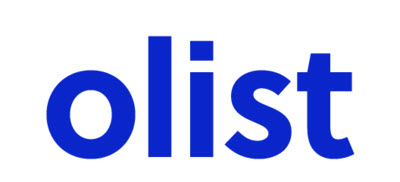
# Machine Language 
# Lab I- Visualization and Data Preprocessing

### Submitted by
- Helene Barrera 
- Justin Ehly 
- Babatunde “John” Olanipekun 
- Feby Thomas Cheruvathoor


---
### Outline
**Business Understanding**	

**Data Meaning Type**	

**Data Quality**	
* Missing Values	
* Duplicate Data	
* Outliers Continuous Variables	

**Simple Statistics**	

**Visualize Attributes**	
* Broad, high level visualization of the dataset	

**Explore Joint Attributes**	

**Explore Attributes and Class**  
* Delivery Performance	
* Average Delay in Delivery State Level	
* Key Findings	
    * Approach to modeling delivery estimate	
* Predict Review Score	
    * Approach	

**New Features**  
  
**References**	

**Appendix**	
* Data Meaning Type	
* Modeling	
* Evaluation	
* Success Criteria	
---

## 1. Business Understanding

Olist is the largest department store in Brazilian marketplaces, although it is relatively new to the eCommerce space having been founded in 2016. Much like Amazon and Etsy, Olist provides an integrated platform which connects the small,medium sellers to reach out to international marketplaces. Merchants are able to sell their products through the Olist Store and ship them directly to customers using Olist logistics partners. Olist provides a unique sales experience while improving their logistics performance, specifically when it comes to fulfillment options and Last Mile Delivery. It is important for Olist to ensure their logistics partners are performing effectively to improve customer review scores and gaining customer confidence in Olist eCommerce platform.

Olist contributed its past years sales order data to kaggle(link), dataset consists of roughly 100,000 orders from 2016 to 2018 and is multidimensional covering order information, consumer information, seller information, geolocation information, product attributes and customer reviews. The dataset will allow us to meet our stated  business objectives. We will process the data using a combination of Python for data cleaning, mining, wrangling, exploration, feature selection and data modeling and will possibly employ cloud services for tasks such as running sentiment analysis. We are intended to bring out data insights which will help the Olist platform to the next level.  

**Logistic Advancement:** There are many factors that contribute to a customer’s review score, but the majority of our data set is focused around the logistics side of eCommerce. We have detailed time stamps through each stage of purchase and delivery, as well as geographical information which will allow us to dig into how to make improvements to shipping time and estimated shipping time. Our success can be measured by improvements to the estimated delivery time and a decrease in bad reviews that mention shipping. 

**Improving Customer Satisfaction:** Based on the attributes available in the data set, we decided to approach the dataset from the standpoint of working for Olist to help improve customer satisfaction, which in turn likely has a strong relationship with various logistics attributes. To that end, we will focus on understanding how factors like price, freight cost and estimated delivery time influence each other. 

**Accurate Price Predictions:** Along the same lines, we will choose a specific product category and look at trends for products in that category for the past 3 years to understand seasonal influences on price and total sales. We can also identify patterns in customer purchases based on the day of the week and major holidays and festivals observed in Brazil. This will help ensure that Olist is prepared for fluctuations in the use of their site, allowing them to adjust their logistics partners and stock accordingly. A major success factor will be to obtain accuracy of at least 85%, precision of at least 80%, sensitivity of at least 85%. These values are subject to review, contingent upon exploratory data analysis.


## 2. Data Meaning Type
Olist supplemented 120MB of data and the high level data schema is depicted below.  (Figure 2A)
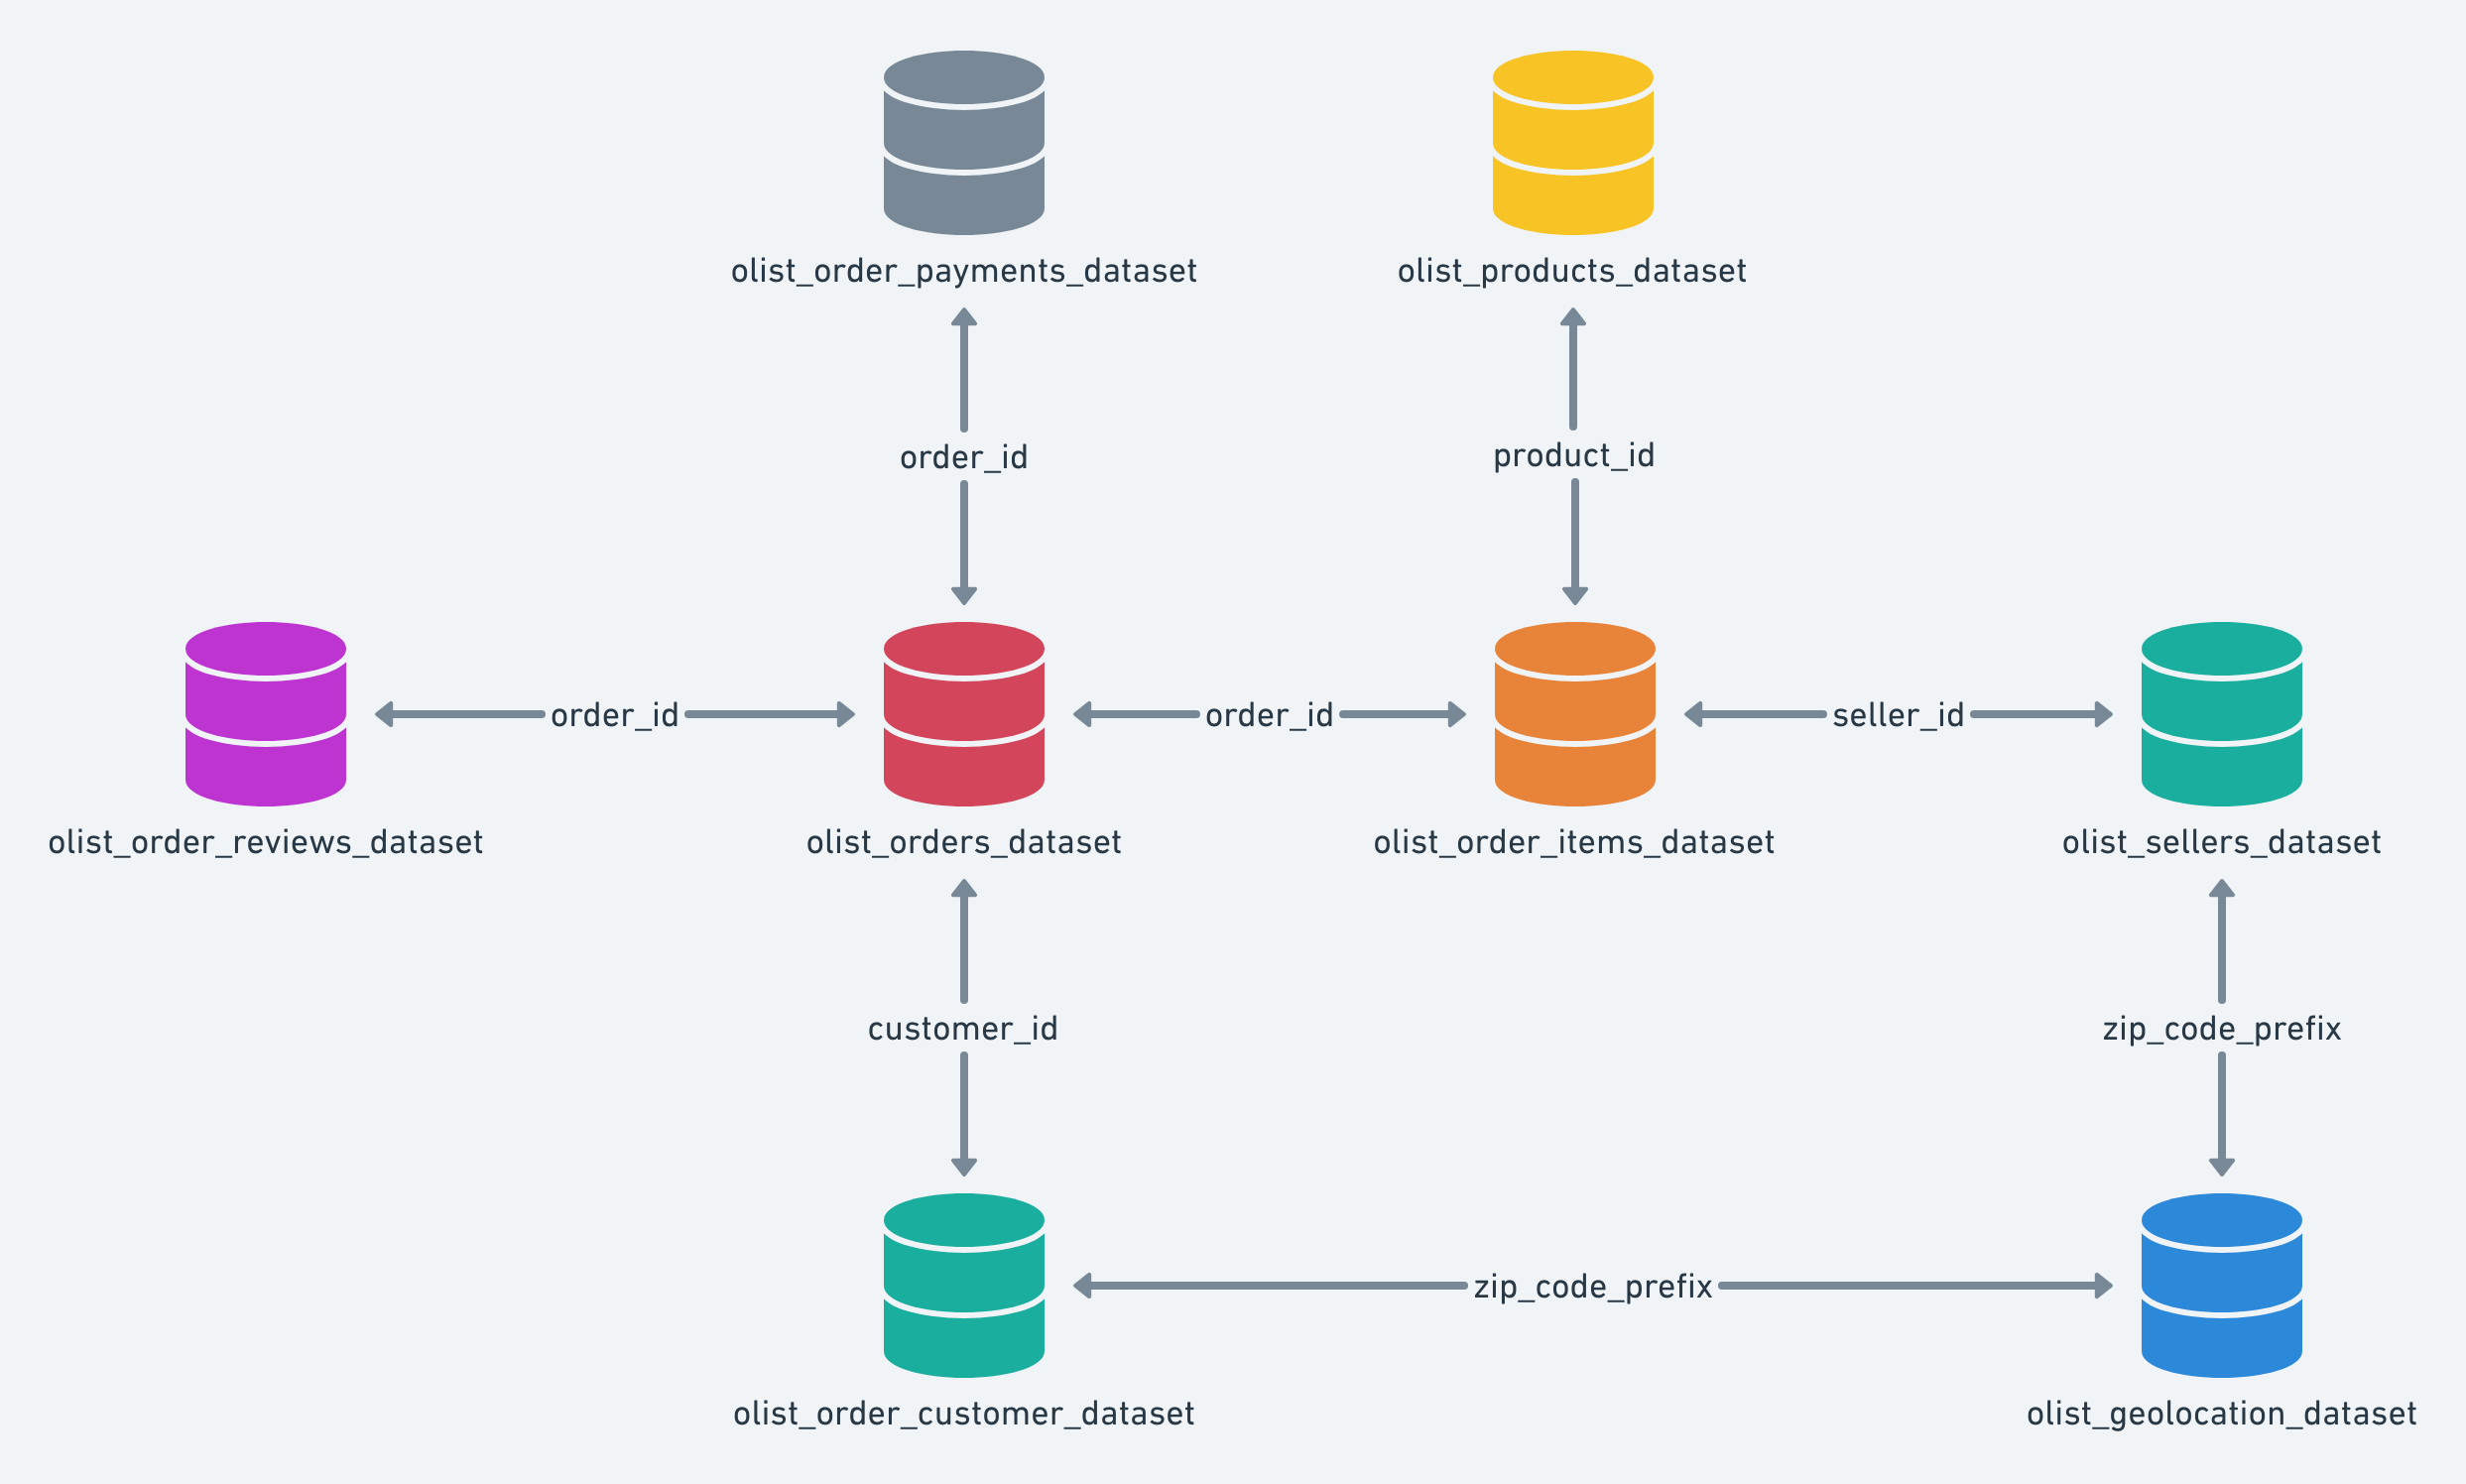
*Figure 2A*



In [1]:
# set up environment
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import copy
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline


In [2]:
# change working directory
#os.chdir(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset\Olist_Datasets")
#"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset"
os.chdir('C:/Users/justi/Documents/GitHub/olist/data')

# get current working directory
os.getcwd()

'C:\\Users\\justi\\Documents\\GitHub\\olist\\data'

In [3]:
# set up some colors and text attributes to markdown
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
customers = pd.read_csv('olist_customers_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')


In [5]:
the_df = {'customers': customers,
              'items': items, 
              'payments': payments, 
              'orders': orders, 
              'products': products, 
              'sellers': sellers, 
              'reviews': reviews,
              'categories': translation,
              'geolocation': geolocation}
print("_______________________________________________________________________________________________")
print("Description of the {} dataframes".format(len(the_df)))
print("_______________________________________________________________________________________________")
for i, j in the_df.items():
    print('{} dataframe:      {} rows and {} columns'.format(str(i),j.shape[0],j.shape[1]))
    print(list(j.columns))
    print("")
print("________________________________________________________________________________________________")

_______________________________________________________________________________________________
Description of the 9 dataframes
_______________________________________________________________________________________________
customers dataframe:      99441 rows and 5 columns
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

items dataframe:      112650 rows and 7 columns
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

payments dataframe:      103886 rows and 5 columns
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

orders dataframe:      99441 rows and 8 columns
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

products dataframe:      32951 rows and 9 columns
['product_id', 'product_category_n

# Merge the CSV Files
### Begin the process of merging the csv files together
Keeping in mind there are going to duplicate keys for order_id and customer_id because one order may contain 
- 1 item
- 1 payment 
- 1 review (each item may have a separate review)

### List of Pre-Merge Items
1. Need to merge products + translations as pdf
    * imput 2 missing translations as products_eng
    * remove original category
    * rename english category to shorten name to *product_category_english*


### Merge order
1. inner merge customers + orders as df 
2. right merge df + reviews as df2
3. right merge df2 + payments as df3
4. right merge df3 + items as df4
5. left merge df4 + pdf as df5
6. left merge df5 + sellers as df6
7. set olist = df6
   

## DF1
### Merge customers + orders df's

In [6]:
# get data from github repo on hard disk
df = pd.merge(orders, customers, on="customer_id")


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


In [8]:
#df.head(5)


## DF2
### Now let's add the reviews df (left)
1. how many duplicate keys order_id are there in the df
2. merge df with olist df
3. verify merge and check that we have the correct number of duplicated keys in the resulting merge

In [9]:
# how may duplicate order_id keys are in this dataframe?
dup_review_keys = reviews[reviews.order_id.duplicated()]
dup_review_keys.count()
#559 - this works out because we have 99441 unique order_ids that equals customer_id's 

review_id                  559
order_id                   559
review_score               559
review_comment_title        18
review_comment_message     198
review_creation_date       559
review_answer_timestamp    559
dtype: int64

In [10]:
df2 = df.merge(reviews, on='order_id', how="right")

In [11]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       100000 non-null  object
 1   customer_id                    100000 non-null  object
 2   order_status                   100000 non-null  object
 3   order_purchase_timestamp       100000 non-null  object
 4   order_approved_at              99839 non-null   object
 5   order_delivered_carrier_date   98207 non-null   object
 6   order_delivered_customer_date  97013 non-null   object
 7   order_estimated_delivery_date  100000 non-null  object
 8   customer_unique_id             100000 non-null  object
 9   customer_zip_code_prefix       100000 non-null  int64 
 10  customer_city                  100000 non-null  object
 11  customer_state                 100000 non-null  object
 12  review_id                      100000 non-nul

In [12]:
df2.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  161
order_delivered_carrier_date      1793
order_delivered_customer_date     2987
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             88285
review_comment_message           58247
review_creation_date                 0
review_answer_timestamp              0
dtype: int64

In [13]:
# checking to make sure we are getting the correct results after merging the order reviews with olist dataframe
duplicate_rows = df2[df2.order_id.duplicated(keep=False)]
duplicate_rows.count()
# 8545 records have duplicated order_ids, so we know that many reviews are part of multi-item orders

order_id                         1114
customer_id                      1114
order_status                     1114
order_purchase_timestamp         1114
order_approved_at                1112
order_delivered_carrier_date     1094
order_delivered_customer_date    1070
order_estimated_delivery_date    1114
customer_unique_id               1114
customer_zip_code_prefix         1114
customer_city                    1114
customer_state                   1114
review_id                        1114
review_score                     1114
review_comment_title               36
review_comment_message            399
review_creation_date             1114
review_answer_timestamp          1114
dtype: int64

## DF3
### right merge the payments df to the olist df using the order_id key
1. check how many duplicate keys we have: order_id, there are 4445 more rows in this df than the original orders df
2. merge
3. confirm merge

In [14]:
# how many order_id's are duplicated in the payment dataframe, based on our initial 
# kaggle data the df is 4445 recrods larger than the orders df
pymt_dups = payments[payments.order_id.duplicated(keep=False)] #false keeps the first record in the duplicates
pymt_dups.count()
# 7407 records were part of multi-payment orders

order_id                7407
payment_sequential      7407
payment_type            7407
payment_installments    7407
payment_value           7407
dtype: int64

In [15]:
# merge df's

df3 = df2.merge(payments, on="order_id", how="right")
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104485 entries, 0 to 104484
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104485 non-null  object 
 1   customer_id                    104485 non-null  object 
 2   order_status                   104485 non-null  object 
 3   order_purchase_timestamp       104485 non-null  object 
 4   order_approved_at              104309 non-null  object 
 5   order_delivered_carrier_date   102587 non-null  object 
 6   order_delivered_customer_date  101331 non-null  object 
 7   order_estimated_delivery_date  104485 non-null  object 
 8   customer_unique_id             104485 non-null  object 
 9   customer_zip_code_prefix       104485 non-null  int64  
 10  customer_city                  104485 non-null  object 
 11  customer_state                 104485 non-null  object 
 12  review_id                     

In [16]:
df3.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  176
order_delivered_carrier_date      1898
order_delivered_customer_date     3154
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             92334
review_comment_message           60862
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
dtype: int64

## DF4
### left merge the items df to the olist df using the order_id key
1. how many duplicate keys are there: order_id, there are 13,209 more records in this df than in the original orders df
2. merge
3. confirm merge 

In [17]:
# confirm duplicate keys
dup_item_keys = items[items.order_id.duplicated(keep=False)] #false counts the first row of the duplicated rows
dup_item_keys.count()
# so we have about 23787 records that are part of multiple item order_ids - just good to know for summary stats

order_id               23787
order_item_id          23787
product_id             23787
seller_id              23787
shipping_limit_date    23787
price                  23787
freight_value          23787
dtype: int64

In [18]:
# merge items df into olist df
# merge right because there are more entries in the items df than the orders df & items won't exist if they weren't ordered
df4 = df3.merge(items, on='order_id', how='left') 
df4.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119148 entries, 0 to 119147
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119148 non-null  object 
 1   customer_id                    119148 non-null  object 
 2   order_status                   119148 non-null  object 
 3   order_purchase_timestamp       119148 non-null  object 
 4   order_approved_at              118971 non-null  object 
 5   order_delivered_carrier_date   117062 non-null  object 
 6   order_delivered_customer_date  115727 non-null  object 
 7   order_estimated_delivery_date  119148 non-null  object 
 8   customer_unique_id             119148 non-null  object 
 9   customer_zip_code_prefix       119148 non-null  int64  
 10  customer_city                  119148 non-null  object 
 11  customer_state                 119148 non-null  object 
 12  review_id                     

In [19]:
df4.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             104959
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                       833
product_id                          833
seller_id                           833


## Products DF
### Merger English translations of categories with the products dataframe
1. there are also 71 english category translations made available to us, we should merge those 2 df's 
2. verify that merge
3. merge that revised df to the olist dataframe

In [20]:
# quick visual of the translation df
translation.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [21]:
unique_categories_portuguese = products.product_category_name.unique() #creates an array objest of unique categories
len(unique_categories_portuguese) # counts the number of entries in the array
# we have 74 unique categories in portuguese and only 71 translated -
# we will have 3x missing category translations
# we will soon find out if kaggle did the homework for us and only translated the ones used in the overall dataset

74

In [22]:
# merge products with translation
pdf = products.merge(translation, on='product_category_name', how='left')
pdf.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [23]:
#let's make sure we didn't lose any data
pdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [24]:
# let's see what didn't translate
uniq = pdf.drop_duplicates(subset = ['product_category_name','product_category_name_english']) # capture unique values only
uniq = uniq[['product_category_name','product_category_name_english']] # just want to keep these 2 columns
uniq

,product_category_name,product_category_name_english
0,perfumaria,perfumery
1,artes,art
2,esporte_lazer,sports_leisure
3,bebes,baby
4,utilidades_domesticas,housewares
...,...,...
4713,casa_conforto_2,home_comfort_2
5821,portateis_cozinha_e_preparadores_de_alimentos,NaN
6060,seguros_e_servicos,security_and_services
7046,moveis_colchao_e_estofado,furniture_mattress_and_upholstery


In [25]:
# looks like we are missing some english translations for categories - let's see how many
# create a boolean variable to filter the the products by the NaNs from the english translatioins
no_eng_trans = uniq.product_category_name_english.isnull()

#filter the dataframe by the returned NA lines for english translations
no_trans = uniq[no_eng_trans]

#show how many orders were cancelled
no_trans.head()

,product_category_name,product_category_name_english
105,NaN,NaN
1628,pc_gamer,NaN
5821,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [26]:
#let's go ahead and impute that pc_gamer and
# also using google translate, the other one is: portable kitchen and food preparers

# disable chained assignments
pd.options.mode.chained_assignment = None 

for i in range(len(pdf)):
    if pdf.iloc[i,1] == "pc_gamer":
        pdf.iloc[i,9] = "pc_gamer"
    else:
        if pdf.iloc[i,1] == "portateis_cozinha_e_preparadores_de_alimentos":
            pdf.iloc[i,9] = "portable_kitchen_and_food_preparers"


In [27]:
pdf.isnull().sum()
# looks like everything is matching up nicely here

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    610
dtype: int64

In [28]:
unq_cat = pdf.product_category_name_english.unique()
for x in range(len(unq_cat)):
    print(unq_cat[x])
# ok looks like we successfully added those 2 categories to the english translation list

perfumery
art
sports_leisure
baby
housewares
musical_instruments
cool_stuff
furniture_decor
home_appliances
toys
bed_bath_table
construction_tools_safety
computers_accessories
health_beauty
luggage_accessories
garden_tools
office_furniture
auto
electronics
fashion_shoes
telephony
stationery
fashion_bags_accessories
computers
home_construction
watches_gifts
construction_tools_construction
pet_shop
small_appliances
agro_industry_and_commerce
nan
furniture_living_room
signaling_and_security
air_conditioning
consoles_games
books_general_interest
costruction_tools_tools
fashion_underwear_beach
fashion_male_clothing
kitchen_dining_laundry_garden_furniture
industry_commerce_and_business
fixed_telephony
construction_tools_lights
books_technical
home_appliances_2
party_supplies
drinks
market_place
la_cuisine
costruction_tools_garden
fashio_female_clothing
home_confort
audio
food_drink
music
food
tablets_printing_image
books_imported
small_appliances_home_oven_and_coffee
fashion_sport
christmas_

In [29]:
# drop the original product category name in portuguese
pdf = pdf.drop(['product_category_name'], axis=1) # axis=1 means column
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_name_lenght            32341 non-null  float64
 2   product_description_lenght     32341 non-null  float64
 3   product_photos_qty             32341 non-null  float64
 4   product_weight_g               32949 non-null  float64
 5   product_length_cm              32949 non-null  float64
 6   product_height_cm              32949 non-null  float64
 7   product_width_cm               32949 non-null  float64
 8   product_category_name_english  32341 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [30]:
# rename category column
pdf = pdf.rename(columns={'product_name_lenght':'product_name_length',
                          'product_description_lenght': 'product_description_length',
                          'product_category_name_english': "product_category_english"})
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_name_length         32341 non-null  float64
 2   product_description_length  32341 non-null  float64
 3   product_photos_qty          32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
 8   product_category_english    32341 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## DF5
### left merge the NEW REVISED products dataframe with the olist dateframe

In [31]:
df5 = df4.merge(pdf, on="product_id", how='left')
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119148 entries, 0 to 119147
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119148 non-null  object 
 1   customer_id                    119148 non-null  object 
 2   order_status                   119148 non-null  object 
 3   order_purchase_timestamp       119148 non-null  object 
 4   order_approved_at              118971 non-null  object 
 5   order_delivered_carrier_date   117062 non-null  object 
 6   order_delivered_customer_date  115727 non-null  object 
 7   order_estimated_delivery_date  119148 non-null  object 
 8   customer_unique_id             119148 non-null  object 
 9   customer_zip_code_prefix       119148 non-null  int64  
 10  customer_city                  119148 non-null  object 
 11  customer_state                 119148 non-null  object 
 12  review_id                     

In [32]:
df5.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             104959
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                       833
product_id                          833
seller_id                           833


## DF6
### left merge Sellers df with the olist df
There are 3,095 records in the seller df

In [33]:
sellers.isna().sum()
#no missing values

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [34]:
#merge df's
df6 = df5.merge(sellers, on="seller_id", how='left')
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119148 entries, 0 to 119147
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119148 non-null  object 
 1   customer_id                    119148 non-null  object 
 2   order_status                   119148 non-null  object 
 3   order_purchase_timestamp       119148 non-null  object 
 4   order_approved_at              118971 non-null  object 
 5   order_delivered_carrier_date   117062 non-null  object 
 6   order_delivered_customer_date  115727 non-null  object 
 7   order_estimated_delivery_date  119148 non-null  object 
 8   customer_unique_id             119148 non-null  object 
 9   customer_zip_code_prefix       119148 non-null  int64  
 10  customer_city                  119148 non-null  object 
 11  customer_state                 119148 non-null  object 
 12  review_id                     

In [35]:
df6.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             104959
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                       833
product_id                          833
seller_id                           833


## Create olist dataframe
##### Merge Order Referce
1. **df**: inner merge customers + orders as df
2. **df2**: right merge df + reviews as df2
3. **df3**: right merge df2 + payments as df3
4. **df4**: right merge df3 + items as df4
5. **df5**: left merge df4 + pdf as df5
6. **df6**: left merge df5 + sellers as df6
7. **olist**: set olist = df6

In [36]:
# now we have starting points we can refer back to in case we get lost somewhere in the shuffle
olist = copy.deepcopy(df6)

In [37]:
#changing attributes data types
continuous_features = ['price','freight_value', 'payment_sequential','payment_installments','payment_value',
                      'product_name_length','product_description_length', 'product_photos_qty','product_weight_g',
                      'product_length_cm','product_height_cm','product_width_cm', 'review_score'] 

cat_features = ['order_status', 'customer_city', 'customer_state', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 
                'seller_city', 'seller_state', 'product_category_english','review_id',
               'review_comment_title','review_comment_message','payment_type',
               'order_item_id', 'product_id','seller_id','order_id', 'customer_id','customer_unique_id'] 

date_features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 


In [38]:
# use the "astype" function to change the variable type
olist[continuous_features] = olist.copy()[continuous_features].astype(np.float64)
olist[cat_features] = olist.copy()[cat_features].astype("category")

### Fix Dates as datetime64[ns]

In [39]:
# fix dates

for i in date_features:
    olist.loc[:,i] = pd.to_datetime(olist.copy().loc[:,i], errors="coerce")


#### Add Total_Order_ Amt to olist dataframe 

In [40]:
olist['tot_order_amt'] = olist.price + olist.freight_value
olist[['payment_type','price','freight_value','payment_value','tot_order_amt']].head(10)

,payment_type,price,freight_value,payment_value,tot_order_amt
0,credit_card,79.80,19.53,99.33,99.33
1,credit_card,17.00,7.39,24.39,24.39
2,credit_card,56.99,8.72,65.71,65.71
3,credit_card,89.90,17.88,107.78,107.78
4,credit_card,89.90,17.88,107.78,107.78
5,credit_card,113.57,14.88,128.45,128.45
6,credit_card,34.35,13.71,96.12,48.06
7,credit_card,34.35,13.71,96.12,48.06
8,credit_card,59.90,21.26,81.16,81.16
9,credit_card,39.99,11.85,51.84,51.84


## Dataframe Information .info()
Dataframe information and the attribute description is list below.

In [41]:
olist.info() # now our data looks better!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119148 entries, 0 to 119147
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119148 non-null  category      
 1   customer_id                    119148 non-null  category      
 2   order_status                   119148 non-null  category      
 3   order_purchase_timestamp       119148 non-null  datetime64[ns]
 4   order_approved_at              118971 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117062 non-null  datetime64[ns]
 6   order_delivered_customer_date  115727 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119148 non-null  datetime64[ns]
 8   customer_unique_id             119148 non-null  category      
 9   customer_zip_code_prefix       119148 non-null  category      
 10  customer_city                  119148 non-null  category      
 11  

### Table of olist dataframe attributes with definitions
| Data# | Attribute | Value_Type | Description |  
|---- | ----------- | ----------- |--------------- |  
| 0 | order_id | category |  order unique identifier (99,441 unique) |  
| 1 | customer_id | category | key to the orders dataset - each order has a unique customer_id (99,431 unique) |  
| 2 | order_status | category | order status, 7-levels (shipped, canceled, invoiced, processing, approved, unavailable, delivered)
 |  
| 3 | order_purchase_timestamp | datetime64[ns] | purchase initiation timestamp (9/4/16 – 10/17/18) |
| 4 | order_approved_at | datetime64[ns] | payment approval timestamp (9/15/16-9/3/18) |
| 5 | order_delivered_carrier_date |  | datetime64[ns] | order posting timestamp when it was handed to the logistic partner (10/8/16-9/11/18) |
| 6 | order_delivered_customer_date | datetime64[ns] | actual order delivery date to the customer (10/11/16 – 10/17/18) |
| 7 | order_estimated_delivery_date | datetime64[ns] | estimated delivery date provided to the customer at the time of purchase initiation (9/29/16 – 11/11/18)
| 8 | customer_unique_id | category | unique identifier of a customer (96,096) |
| 9 | customer_zip_code_prefix | category | first five digits of customer zip code  (14,994 unique) |
| 10 | customer_city | category | customer city name (4,119 unique) |
| 11 | customer_state | category | customer state name (27 unique) |
| 12 | review_id | category |  review unique identifier (99,173 unique |
| 13 | review_score | float64 | 1 to 5 rating given by the customer on a satisfaction survey (1-5) |
| 14 | review_comment_title | category |  comment titles from the review left by the customer (4600 unique)|
| 15 | review_comment_message | category | comment message from the review left by the customer [note: 58% missing] (36,921 unique) |
| 16 | review_creation_date | datetime64[ns] | date satisfaction survey sent to customer (10/10/16-8/30/18) |
| 17 | review_answer_timestamp | datetime64[ns] | satisfaction survey answer timestamp (10/7/16 – 10/29/18) |
| 18 | payment_sequential | float64 | number of payment methods used by the customer (1-26) |
| 19 | payment_type | category | method of payment by customer [4 levels: credit_card, boleto, voucher, debit_card] |
| 20 | payment_installments | float64 | number of payment installments by customer (0-24) |
| 21 | payment_value | float64 | transaction value (0-13664.08, note vouchers don’t count towards payment value) |
| 22 | order_item_id | category | sequential number identifying number of items included in the same order (1-21) |
| 23 | product_id | category | product unique identifier (32,951 unique)|
| 24 | seller_id | category | seller unique identifier (3,095 unique) |
| 25 | shipping_limit_date | datetime64[ns] | seller shipping limit date for handing the order off to the logistic partner (9/18/16-4/9/20) |
| 26 | price | float64 | item price (0.85-6,735)|
| 27 | freight_value | float64 | item freight value (if an order has more than one item, the freight value is split between the items, scale: 0-409.68) |
| 28 | product_name_length | float64 | number of characters extracted from the product name (5-76) |
| 29 | product_description_length | float64 | number of characters extracted from the product description (4-3992) |
| 30 | product_photos_qty | float64 | number of product photos published (1-20) |
| 31 | product_weight_g | float64 | product weight measured in grams (0-40425) |
| 32 | product_length_cm | float64 | product length measured in centimeters (7-105) |
| 33 | product_height_cm | float64 | product height measured in cemitmeters (2-105) |
| 34 | product_width_cm |  float64 | product width measured in centimeters (6-118) |
| 35 | product_category_english | category | product category name in English (71 levels – 2 need to imputed) |
| 36 | seller_zip_code_prefix | category | first five digits of seller zip code (2246 unique) |
| 37 | seller_city | category | seller city name (611 unique) |
| 38 | seller_state | category | seller state name (23 unique) |
| 39 | tot_order_amt | float64 | tot_order_amt = price + freight_value |

In [42]:
pmt = olist[olist.order_id=='e481f51cbdc54678b7cc49136f2d6af7']
pmt=pmt[['order_id','product_id','payment_sequential','payment_type','price','freight_value','payment_value','tot_order_amt']]
pmt

,order_id,product_id,payment_sequential,payment_type,price,freight_value,payment_value,tot_order_amt
12272,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,1.0,credit_card,29.99,8.72,18.12,38.71
50760,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,3.0,voucher,29.99,8.72,2.00,38.71
104517,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,2.0,voucher,29.99,8.72,18.59,38.71


# <span style="color:blue"> 3. Data Quality</span>
### Verify data quality: 
###### Directions
- Explain any missing values, duplicate data, and outliers. 
- Are those mistakes? 
- How do you deal with these problems? 
- Be specific.

## <span style="color:blue">a. Missing Values</span>
* Rename the column names product_name_lenght and  product_description_lenght to correct the spelling on length (this was handled during the dataframe creation phase)

* Initially our dataset had quite a few thousand missing values, but we made the business decision to only focus on orders that were completed based on 2 factors:
    1. Order status was ‘delivered’ 
    2.  Timestamp showing that the order was delivered to the customer  
    
* Once we reduced the initial dataset to only completed orders we found there were still some missing values:


In [43]:
# create a backup dateframe 
olist_backup = copy.deepcopy(olist)

In [44]:
# first let's just grab all records with order_status of delivered since that attribute has no missing values
olist = olist[olist.order_status == "delivered"]
print(olist.info())
print('------------------------')
print('order_status', olist.order_status.describe())
# should remove order_status now that it is only one level, but I want to wait and do that at the end.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115728 entries, 0 to 119147
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115728 non-null  category      
 1   customer_id                    115728 non-null  category      
 2   order_status                   115728 non-null  category      
 3   order_purchase_timestamp       115728 non-null  datetime64[ns]
 4   order_approved_at              115713 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115726 non-null  datetime64[ns]
 6   order_delivered_customer_date  115720 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115728 non-null  datetime64[ns]
 8   customer_unique_id             115728 non-null  category      
 9   customer_zip_code_prefix       115728 non-null  category      
 10  customer_city                  115728 non-null  category      
 11  

In [45]:
olist.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date          2
order_delivered_customer_date         8
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             101977
review_comment_message            66767
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


* Drop the 8 records missing a customer delivered timestamp

In [46]:
# let's also drop the 8 records missing a customer delivered timestamp
olist = olist[olist.order_delivered_customer_date.notnull()]
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115720 entries, 0 to 119147
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115720 non-null  category      
 1   customer_id                    115720 non-null  category      
 2   order_status                   115720 non-null  category      
 3   order_purchase_timestamp       115720 non-null  datetime64[ns]
 4   order_approved_at              115705 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115719 non-null  datetime64[ns]
 6   order_delivered_customer_date  115720 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115720 non-null  datetime64[ns]
 8   customer_unique_id             115720 non-null  category      
 9   customer_zip_code_prefix       115720 non-null  category      
 10  customer_city                  115720 non-null  category      
 11  

###### NOTE: That cleaned up a lot of missing values and didn't reduce the dataset very much.**

1. **Order_delivered_carrier_date:** The 1 missing value for the delivered to carrier attribute appears to be python not recognizing the datetime value in the cell, after much trial and error, it is just easier to delete the one record.


In [47]:
olist[olist.order_delivered_carrier_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
28075,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,a2ac81ecc3704410ae240e74d4f0af40,13334,...,2.0,7000.0,16.0,50.0,55.0,furniture_decor,87240.0,terra boa,PR,193.98


In [48]:
olist.iloc[87582,4]
# strange, there is a time there - looks like it is a converting issue

Timestamp('2017-11-27 21:39:38')

In [49]:
olist.iloc[87582,4] = pd.to_datetime(olist.iloc[87582,4], unit='ns')

In [50]:
olist[olist.order_delivered_carrier_date.isnull()]
# still not converting, let's just delete it

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
28075,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,a2ac81ecc3704410ae240e74d4f0af40,13334,...,2.0,7000.0,16.0,50.0,55.0,furniture_decor,87240.0,terra boa,PR,193.98


In [51]:
olist = olist[olist.order_delivered_carrier_date.notnull()]
olist.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             101972
review_comment_message            66763
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


2. **Order_approved_at:** For the 15 order_approved_at missing values, we imputed those values by adding the difference between the average of the order_purchase_timestamp  and the order_approved_at timestamp from the rest of the dataframe, that was about 10.5 hours.

In [52]:
# what are those 15 missing values for order_approved_at?
missing_approved = olist[olist['order_approved_at'].isnull()]
missing_approved


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
1638,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,8a9a08c7ca8900a200d83cf838a07e0b,6708,...,2.0,20800.0,75.0,40.0,40.0,small_appliances,14882.0,jaboticabal,SP,349.01
33148,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,6ff8b0d7b35d5c945633b8d60165691b,11030,...,2.0,700.0,26.0,16.0,21.0,sports_leisure,83323.0,pinhais,PR,54.51
45131,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,7e1a5ca61b572d76b64b6688b9f96473,62700,...,1.0,1200.0,42.0,25.0,15.0,cool_stuff,3426.0,sao paulo,SP,106.81
45159,51eb2eebd5d76a24625b31c33dd41449,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29,79af1bbf230a2630487975aa5d7d6220,37660,...,1.0,1200.0,30.0,5.0,20.0,furniture_decor,14940.0,ibitinga,SP,77.06
46343,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,c8822fce1d0bfa7ddf0da24fff947172,27945,...,1.0,1200.0,42.0,25.0,15.0,cool_stuff,3426.0,sao paulo,SP,95.76
47521,3c0b8706b065f9919d0505d3b3343881,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23,c094ac95fcd52f821809ec232a7a6956,95795,...,1.0,2700.0,42.0,11.0,36.0,bed_bath_table,14940.0,ibitinga,SP,157.19
51239,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,5a4fa4919cbf2b049e72be460a380e5b,35620,...,3.0,4300.0,36.0,13.0,20.0,garden_tools,3554.0,sao paulo,SP,154.23
51291,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21,bc1896dc77f49e6dec880445a9b443a3,21020,...,1.0,250.0,18.0,3.0,28.0,telephony,11010.0,santos,SP,63.52
51292,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21,bc1896dc77f49e6dec880445a9b443a3,21020,...,1.0,250.0,18.0,3.0,28.0,telephony,11010.0,santos,SP,63.52
69152,2babbb4b15e6d2dfe95e2de765c97bce,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31,f79be7c08dd24b72d34634f1b89333a4,65110,...,1.0,1200.0,42.0,25.0,15.0,cool_stuff,3426.0,sao paulo,SP,106.81


In [53]:
# looks like we can impute those values...let's see what the average time is between and order purchase and approval
purchase_to_approve = olist[['order_purchase_timestamp','order_approved_at','order_status']]
purchase_to_approve.dtypes

order_purchase_timestamp    datetime64[ns]
order_approved_at           datetime64[ns]
order_status                      category
dtype: object

In [54]:
# let's remove those 14 missing values
purchase_to_approve[purchase_to_approve.order_approved_at.isnull()]

,order_purchase_timestamp,order_approved_at,order_status
1638,2017-02-18 14:40:00,NaT,delivered
33148,2017-01-19 12:48:08,NaT,delivered
45131,2017-02-18 16:48:35,NaT,delivered
45159,2017-02-18 15:52:27,NaT,delivered
46343,2017-02-17 13:05:55,NaT,delivered
47521,2017-02-17 15:53:27,NaT,delivered
51239,2017-02-17 17:21:55,NaT,delivered
51291,2017-02-18 22:49:19,NaT,delivered
51292,2017-02-18 22:49:19,NaT,delivered
69152,2017-02-18 17:15:03,NaT,delivered


In [55]:
# removing na's
purchase_to_approve = purchase_to_approve.dropna(axis=0)

In [56]:
purchase_to_approve[purchase_to_approve.order_approved_at.isnull()].sum()

Series([], dtype: float64)

In [57]:
# let's get some averages
purchase_to_approve['pta_time'] = purchase_to_approve['order_approved_at'] - purchase_to_approve['order_purchase_timestamp']
# convert timedelta to numeric value for averaging
purchase_to_approve['new'] = purchase_to_approve['pta_time'].values.astype(np.int64)                                           

purchase_to_approve.head()


,order_purchase_timestamp,order_approved_at,order_status,pta_time,new
0,2018-04-25 22:01:49,2018-04-25 22:15:09,delivered,0 days 00:13:20,800000000000
1,2018-06-26 11:01:38,2018-06-26 11:18:58,delivered,0 days 00:17:20,1040000000000
2,2017-12-12 11:19:55,2017-12-14 09:52:34,delivered,1 days 22:32:39,167559000000000
3,2017-12-06 12:04:06,2017-12-06 12:13:20,delivered,0 days 00:09:14,554000000000
4,2017-12-06 12:04:06,2017-12-06 12:13:20,delivered,0 days 00:09:14,554000000000


In [58]:
# average time to approve purchase from order
avg_time_to_app = purchase_to_approve['new'].sum()/purchase_to_approve['new'].count()
avg_time_to_app
pd.to_timedelta(avg_time_to_app)
# looks like about 10.5 hours is the average so we can just copy the purchase time stamp to the approved for those 14

Timedelta('0 days 10:25:58.381836410')

In [59]:
 #fill in missing values if indices match
olist.order_approved_at = olist.order_approved_at.fillna(olist.order_purchase_timestamp)


In [60]:
#olist.isnull().sum()

##### Freight Discussion
Because our research showed that shipping costs are a big factor (or they were during the period this dataset covers), any values missing for package weight and size should be removed since we have no way to compute those

3. **Product dimension information:** For the 20 values missing for weight and product dimensions, 19 of them had the same item number and the other 1 did not exist anywhere else in the dataset, so we deleted those since there was no way to impute them


In [61]:
# which rows have NAs - specifically those with just 20, I am thinking they are the same rows
missing_pkg_desc = olist[olist['product_weight_g'].isnull()]
missing_pkg_desc[['product_id']]

,product_id
9077,5eb564652db742ff8f28759cd8d2652a
12487,5eb564652db742ff8f28759cd8d2652a
14546,5eb564652db742ff8f28759cd8d2652a
20948,5eb564652db742ff8f28759cd8d2652a
20949,5eb564652db742ff8f28759cd8d2652a
24752,5eb564652db742ff8f28759cd8d2652a
25393,5eb564652db742ff8f28759cd8d2652a
30600,5eb564652db742ff8f28759cd8d2652a
34426,5eb564652db742ff8f28759cd8d2652a
38023,5eb564652db742ff8f28759cd8d2652a


In [62]:
# 19 of the 20 are all the same product_id, let's see if we can find information on that in the rest of the dataset
olist[olist.product_id=='5eb564652db742ff8f28759cd8d2652a']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
9077,ddf16d77e858a32f36e10c289a28ef61,84cc013dd1790fdafb0fa598695cf3c3,delivered,2017-04-24 10:36:24,2017-04-24 10:50:08,2017-04-25 10:59:46,2017-05-05 12:42:39,2017-05-18,90c205b0bed658a20ba141d2960d6811,89930,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,43.52
12487,c1424efcde3c9e9febd9e1761667789e,8a80133b8ace6b21415367a131a75a26,delivered,2017-04-07 14:51:01,2017-04-08 02:45:36,2017-04-11 13:15:21,2017-04-17 19:06:00,2017-05-08,cf5e6a37d7ffef60af859e8025b3112d,35430,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,43.52
14546,e3daea0200104991cb979c2fcc509ae7,4730251e8934a542a009d77dfd027375,delivered,2017-03-30 14:07:44,2017-03-30 14:22:36,2017-03-31 22:06:32,2017-04-07 14:43:38,2017-04-25,8f5f778f80efda903eb24efe69d2a6c3,14340,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,39.96
20948,d38dcb503cd4ddc6ce7702552918bd8f,b0a3a02fe893d9a9385a98db1348244b,delivered,2017-06-04 17:44:18,2017-06-04 17:55:13,2017-06-05 16:13:33,2017-06-14 16:38:11,2017-07-05,2eab2d0ae1015e2e7fb2062f465f524f,91920,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,54.10
20949,d38dcb503cd4ddc6ce7702552918bd8f,b0a3a02fe893d9a9385a98db1348244b,delivered,2017-06-04 17:44:18,2017-06-04 17:55:13,2017-06-05 16:13:33,2017-06-14 16:38:11,2017-07-05,2eab2d0ae1015e2e7fb2062f465f524f,91920,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,54.10
24752,ddf16d77e858a32f36e10c289a28ef61,84cc013dd1790fdafb0fa598695cf3c3,delivered,2017-04-24 10:36:24,2017-04-24 10:50:08,2017-04-25 10:59:46,2017-05-05 12:42:39,2017-05-18,90c205b0bed658a20ba141d2960d6811,89930,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,43.52
25393,bf49f84a0580ef6751e13357776b7ed9,e7f41abe62db82cffe5c8f6138f18fb2,delivered,2017-07-02 21:25:56,2017-07-02 21:35:18,2017-07-04 15:35:12,2017-07-11 16:47:17,2017-07-28,5a06bd3849da761b21e0bd78eeda8688,83880,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,54.10
30600,a7a43f469c0d7bdb0a23a82db125aefa,d7c95dc1ece116c14188092ead3d0951,delivered,2017-08-21 13:00:05,2017-08-21 13:15:11,2017-08-22 20:43:40,2017-08-28 19:07:55,2017-09-18,c0378e9280a6e9401f2b0fd4a288496b,30421,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,54.10
34426,ddf16d77e858a32f36e10c289a28ef61,84cc013dd1790fdafb0fa598695cf3c3,delivered,2017-04-24 10:36:24,2017-04-24 10:50:08,2017-04-25 10:59:46,2017-05-05 12:42:39,2017-05-18,90c205b0bed658a20ba141d2960d6811,89930,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,43.52
38023,6e150190fbe04c642a9cf0b80d83ee16,135a42a465867ff932f1222f71a3efb2,delivered,2017-06-24 16:33:35,2017-06-24 16:45:14,2017-06-29 16:08:40,2017-07-07 18:35:52,2017-07-31,c5628087b9b42549720ee8b57f0a6a98,78600,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,55.79


In [63]:
# doesn't look like there is any data other than these 19 entries, so we can go ahead and remove them
no_prod_id1 = olist[olist.product_id=='5eb564652db742ff8f28759cd8d2652a'].index.values
olist = olist.drop(no_prod_id1, axis=0)

In [64]:
# let's check those were removed
missing_pkg_desc1 = olist[olist['product_weight_g'].isnull()]
missing_pkg_desc1[['product_id']]

,product_id
42562,09ff539a621711667c43eba6a3bd8466


In [65]:
# now let's see if we have any information on that package_id
olist[olist.product_id=='09ff539a621711667c43eba6a3bd8466']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
42562,85f8ad45e067abd694b627859fa57453,1d088dea8732788ec35dd4ee6dd76112,delivered,2017-01-29 21:40:02,2017-01-30 22:32:20,2017-02-02 05:04:58,2017-02-07 10:46:00,2017-03-08,69b2b29382af03e03e486ad307a76000,90160,...,3.0,NaN,NaN,NaN,NaN,baby,86020.0,londrina,PR,1961.0


In [66]:
# no information, so we will drop it too
olist=olist.drop([45964],axis=0)

In [67]:
olist.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             101952
review_comment_message            66757
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


Note: in practice we probably wouldn't have wasted this much time on 20 values, but it's good exercise with python

4. **Product identity information:** For the 1,619 products missing product information such as name length (misspelled in the dataset from Kaggle),  description length (also misspelled in the dataset from Kaggle), photo quantity and category, we performed a search of those same products across the entire dataset and did not find any other product_id’s that match those same product_id’s, in addition when we compiled the dataset, these records did not have categories assigned to them. With this information, it made more sense to remove them from the dataset since we have so much data to work with already.**[Note: This can have an adverse effect if/when we predict pricing and we may need to add those records back in at a later date.]**


In [68]:
missing_prod_info = olist[olist.product_category_english.isna()]
missing_prod_info.product_id.unique()

['9689d8153681f3d8bc3e88622c013b08', 'e1da02256dce4dee2207c36853547c7b', 'c230b471b7e21ff9060e68ee154afd70', 'ab142a566883e92ca907236477173c6c', '7775d718fa8dfebe8015e6e5ee3dc5be', ..., '89dacd5290cff31247fa3e2412c08e02', '2aa23c51528b71a1c9f2ce72f4fc9ad8', '9d09d82a6838777302175f209dcfc4ec', 'b22a81bf3aad8a40e439f0f55dcbdce0', '00d62b338366db4c4aec8547ea8f928e']
Length: 583
Categories (583, object): ['9689d8153681f3d8bc3e88622c013b08', 'e1da02256dce4dee2207c36853547c7b', 'c230b471b7e21ff9060e68ee154afd70', 'ab142a566883e92ca907236477173c6c', ..., '2aa23c51528b71a1c9f2ce72f4fc9ad8', '9d09d82a6838777302175f209dcfc4ec', 'b22a81bf3aad8a40e439f0f55dcbdce0', '00d62b338366db4c4aec8547ea8f928e']

In [69]:
# capture the unique product id's to see if there are any in the dataset that have a match with product information
miss_prod_info_prod_ids = missing_prod_info.product_id.unique()
miss_prod_info_prod_ids

['9689d8153681f3d8bc3e88622c013b08', 'e1da02256dce4dee2207c36853547c7b', 'c230b471b7e21ff9060e68ee154afd70', 'ab142a566883e92ca907236477173c6c', '7775d718fa8dfebe8015e6e5ee3dc5be', ..., '89dacd5290cff31247fa3e2412c08e02', '2aa23c51528b71a1c9f2ce72f4fc9ad8', '9d09d82a6838777302175f209dcfc4ec', 'b22a81bf3aad8a40e439f0f55dcbdce0', '00d62b338366db4c4aec8547ea8f928e']
Length: 583
Categories (583, object): ['9689d8153681f3d8bc3e88622c013b08', 'e1da02256dce4dee2207c36853547c7b', 'c230b471b7e21ff9060e68ee154afd70', 'ab142a566883e92ca907236477173c6c', ..., '2aa23c51528b71a1c9f2ce72f4fc9ad8', '9d09d82a6838777302175f209dcfc4ec', 'b22a81bf3aad8a40e439f0f55dcbdce0', '00d62b338366db4c4aec8547ea8f928e']

In [70]:
# let's see how many matches we find in the dataset, if it is more than 1619, then we may be able to impute some of the NaNs
count=0
for i in range(len(olist)):
    if olist.iloc[i,23] in miss_prod_info_prod_ids:
        count = count+1

count

1619

In [71]:
# confirmed, there are no additional matches of those product_ids outside of these that are NaN for a category
# so we will go ahead and delete them
no_prod_cat = olist[olist.product_category_english.isna()].index
olist = olist.drop(no_prod_cat, axis=0)

In [72]:
olist.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             100413
review_comment_message            65853
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


5. **Review Information:** Due to the nature of shoppers leaving comments, based on the [Online Review Statistics for 2021(Editor’s Choice)](https://websitebuilder.org/blog/online-review-statistics/#:~:text=About%205%25%E2%80%9310%25%20of,shoppers%20specifically%20seek%20negative%20reviews.&text=About%205%25%E2%80%9310%25%20of,shoppers%20specifically%20seek%20negative%20reviews.), about 5-10% of consumers write reviews of e-commerce purchases, so having  the bulk of records missing reviews is not a surprise, but we want to keep those records in the dataframe.


### <span style="color:blue">------End Missing Data------</span>
------------------

In [73]:
# remove order_status column
olist=olist.drop(['order_status'], axis=1)
# will verify in next step that is simple stats


## <span style="color:blue"> b. Duplicate Data </span>
- **order_ids and customer_ids:**
    - Each order has an associated order_id and customer_id
    - An order may contain more than one item, so these order_id and customer_id will be duplicated to show the association of those items with the corresponding order
     - All values associated with an order_id will be duplicated as well, this includes timestamps, unique_customer_id’s, etc.
- **unique_customer_id:** each customer has a unique_customer_id and that will be duplicated to show associated order_id and customer_id’s for customers with more than one order
- **timestamps:** timestamps will be duplicated every time an order_id/ customer_id is duplicated due to an order having multiple items
 - **freight_value:** for orders with more than one item, the freight_value is evenly (as possible) distributed across each item in the order
- **sellers and seller information:** sellers will be duplicated when they have more than one transaction or transactions with more than one item within the dataset


In [74]:
# show the number of duplicated records in the dataframe
dups = olist[olist.duplicated()].count()
dups

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_length              0
product_description_

## <span style="color:blue"> c. Outliers Continous Variables </span>

* We will start exploring outliers by visually inspecting boxplots that can quickly show us what may appear to be outliers or anomalies with the continuous variables. Then we will address each variable in order below starting with review_score and finishing with tot_order_amt. (Figure 3B)

In [75]:
# subset the continuous variables
olist_cont = olist.select_dtypes(np.number)
olist_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114080 entries, 0 to 119147
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   review_score                114080 non-null  float64
 1   payment_sequential          114080 non-null  float64
 2   payment_installments        114080 non-null  float64
 3   payment_value               114080 non-null  float64
 4   price                       114080 non-null  float64
 5   freight_value               114080 non-null  float64
 6   product_name_length         114080 non-null  float64
 7   product_description_length  114080 non-null  float64
 8   product_photos_qty          114080 non-null  float64
 9   product_weight_g            114079 non-null  float64
 10  product_length_cm           114079 non-null  float64
 11  product_height_cm           114079 non-null  float64
 12  product_width_cm            114079 non-null  float64
 13  tot_order_amt 

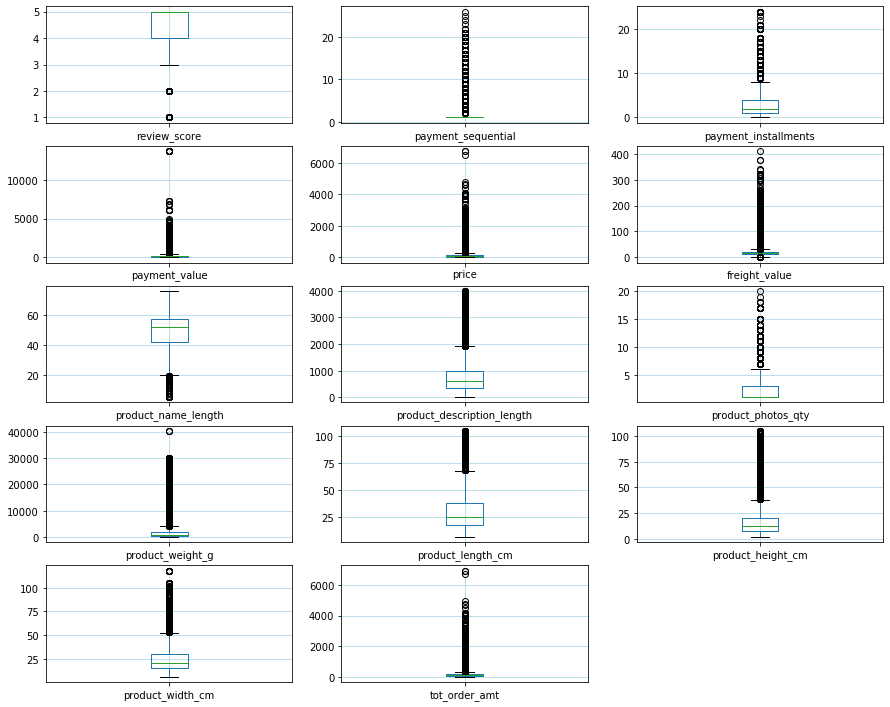

In [76]:
# boxplot of continuous variables
fig, ax = plt.subplots(figsize=(15,15)) #creat plot area

for index, plot_vars in enumerate(olist_cont): #plot_vars is a built-in function
    ax = plt.subplot(6,3, index+1) # nrows, ncols, index
    ax=olist_cont.boxplot(column=plot_vars) # fill with color
    ax.set_facecolor('white') #sets background to white
    ax.grid(color="lightblue")


plt.show()


- **Review Score:** Knowing that this range is from 1-5, we don’t consider these low scores to be outliers


In [77]:
olist_cont.describe()

,review_score,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,tot_order_amt
count,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114079.000000,114079.000000,114079.000000,114079.000000,114080.000000
mean,4.067234,1.090515,2.946292,172.158190,120.032945,20.010321,48.803524,784.811948,2.206408,2108.724016,30.289738,16.606404,23.105208,140.043267
std,1.357761,0.684466,2.781765,266.169133,182.479026,15.726038,10.016122,650.551578,1.717938,3768.696603,16.157570,13.439302,11.739518,189.545761
min,1.000000,1.000000,0.000000,0.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,6.080000
25%,4.000000,1.000000,1.000000,60.950000,39.900000,13.080000,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,55.277500
50%,5.000000,1.000000,2.000000,108.060000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,91.795000
75%,5.000000,1.000000,4.000000,189.370000,133.000000,21.190000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,157.300000
max,5.000000,26.000000,24.000000,13664.080000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,6929.310000


In [78]:
#olist_cont.info()

In [79]:
#create variables
dataseries = pd.Series(range(len(olist_cont.columns)))
dataseries

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
dtype: int64

- **Payment_Sequential:** this means how many forms of payment a customer used, the range is 1:26, sounds crazy, but there are 11 customers that used more than 20 payment types - looking at an individual sample, one customer used vouchers or small payments less than R\\$2 each that added up to the total amount (price + shipping) of R\\$40.85


In [80]:
olist.groupby(by='payment_sequential').count()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
payment_sequential,,,,,,,,,,,,,,,,,,,,,
1.0,109205,109205,109205,109205,109205,109205,109205,109205,109205,109205,...,109205,109204,109204,109204,109204,109205,109205,109205,109205,109205
2.0,3268,3268,3268,3268,3268,3268,3268,3268,3268,3268,...,3268,3268,3268,3268,3268,3268,3268,3268,3268,3268
3.0,632,632,632,632,632,632,632,632,632,632,...,632,632,632,632,632,632,632,632,632,632
4.0,304,304,304,304,304,304,304,304,304,304,...,304,304,304,304,304,304,304,304,304,304
5.0,181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181
6.0,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
7.0,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
8.0,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
9.0,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44


In [81]:
olist[olist.payment_sequential>20]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
31910,285c2e15bebd4ac83635ccc563dc71f4,b246eeed30b362c09d867b9e598bee51,2017-12-08 12:00:04,2017-12-09 11:55:17,2017-12-11 18:42:21,2017-12-21 16:33:10,2018-01-03,2524dcec233c3766f2c2b22f69fd65f4,17604,tupa,...,1.0,541.0,19.0,12.0,16.0,electronics,5588.0,sao paulo,SP,40.85
37168,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,...,1.0,1100.0,16.0,10.0,16.0,bed_bath_table,14940.0,ibitinga,SP,62.68
44875,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,...,1.0,1100.0,16.0,10.0,16.0,bed_bath_table,14940.0,ibitinga,SP,62.68
53292,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,...,2.0,1300.0,50.0,9.0,41.0,bed_bath_table,25803.0,tres rios,RJ,36.20
53293,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,...,2.0,1300.0,50.0,9.0,41.0,bed_bath_table,25803.0,tres rios,RJ,36.20
53294,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,...,8.0,450.0,30.0,20.0,11.0,housewares,89217.0,joinville,SC,88.92
59395,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,...,1.0,1100.0,16.0,10.0,16.0,bed_bath_table,14940.0,ibitinga,SP,62.68
61456,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,...,1.0,1100.0,16.0,10.0,16.0,bed_bath_table,14940.0,ibitinga,SP,62.68
69084,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,...,1.0,1100.0,16.0,10.0,16.0,bed_bath_table,14940.0,ibitinga,SP,62.68
94076,285c2e15bebd4ac83635ccc563dc71f4,b246eeed30b362c09d867b9e598bee51,2017-12-08 12:00:04,2017-12-09 11:55:17,2017-12-11 18:42:21,2017-12-21 16:33:10,2018-01-03,2524dcec233c3766f2c2b22f69fd65f4,17604,tupa,...,1.0,541.0,19.0,12.0,16.0,electronics,5588.0,sao paulo,SP,40.85


In [82]:
x = olist[olist.order_id=='285c2e15bebd4ac83635ccc563dc71f4']
x[['payment_type','price','freight_value','payment_value','tot_order_amt']]
# yup, looks like a bunch of smaller payments/ vouchers were used

,payment_type,price,freight_value,payment_value,tot_order_amt
21860,voucher,29.0,11.85,1.75,40.85
29382,voucher,29.0,11.85,1.23,40.85
31910,voucher,29.0,11.85,1.05,40.85
35882,voucher,29.0,11.85,1.03,40.85
36334,voucher,29.0,11.85,1.96,40.85
44229,voucher,29.0,11.85,1.14,40.85
47290,voucher,29.0,11.85,1.05,40.85
49600,voucher,29.0,11.85,4.07,40.85
51366,voucher,29.0,11.85,1.70,40.85
59537,voucher,29.0,11.85,1.24,40.85


- **Payment Installments:** 425 customers made more than 10 payment installments based on an average price of $251.39


In [83]:
olist[olist.payment_installments>10].price.mean()

251.38943529411767

- **Payment Value:** Payment Value = price+shipping-(any vouchers). (Figure 3C)


In [84]:
# let's look at the 0 payment-value
olist[olist.payment_value==0]
#  4 total, paid with voucher - curious - were those just refund/ exchange vouchers - maybe other vouchers had payments in addition

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
22827,8bcbe01d44d147f901cd3192671144db,f2def7f64f36952f2f5a9791f0285f34,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-01-30 22:43:30,2018-02-02 21:26:42,2018-02-21,cc5aa1b8337e394da54980226bb0f6d4,21040,rio de janeiro,...,3.0,500.0,20.0,30.0,20.0,stationery,13232.0,campo limpo paulista,SP,74.16
50160,6ccb433e00daae1283ccc956189c82ae,843b211abe7b0264dd4a69eafc5bdf43,2017-10-26 23:51:35,2017-10-27 00:46:58,2017-10-27 19:53:03,2017-11-08 18:47:00,2017-11-22,677ad9cdca6c47c733f0cc6e23d7bb4c,25625,petropolis,...,2.0,3300.0,22.0,22.0,22.0,sports_leisure,95650.0,igrejinha,RS,122.04
71865,45ed6e85398a87c253db47c2d9f48216,8eab8f9b3c744b76b65f7a2c0c8f2d6c,2017-06-08 21:18:45,2017-06-08 21:30:18,2017-06-09 08:35:18,2017-06-22 17:44:53,2017-07-10,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,...,2.0,400.0,18.0,11.0,20.0,perfumery,9015.0,santo andre,SP,71.14
115547,b23878b3e8eb4d25a158f57d96331b18,648121b599d98c420ef93f6135f8c80c,2017-05-27 19:20:24,2017-05-27 19:35:17,2017-05-29 04:49:37,2017-06-07 08:53:10,2017-06-29,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,...,1.0,700.0,26.0,12.0,18.0,consoles_games,55325.0,brejao,PE,171.57


In [85]:
# let's look at orders where there was a voucher and more than one payment type
olist[olist.payment_sequential>1]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
36,5cfd514482e22bc992e7693f0e3e8df7,519a8af813fe88578029697625439e8b,2017-10-13 17:19:17,2017-10-13 18:06:56,2017-10-16 19:42:28,2017-10-19 20:41:43,2017-11-06,e2381d9bb9b49c35fff077d4ae613816,38465,arapora,...,2.0,500.0,19.0,9.0,15.0,watches_gifts,6429.0,barueri,SP,710.58
96,3689194c14ad4e2e7361ebd1df0e77b0,40e2d0d7f6579118d9c02dcabf1fff65,2017-10-18 16:01:53,2017-10-19 16:14:29,2017-10-23 14:41:51,2017-10-26 16:08:57,2017-11-07,764bf13c9f7df277b9c0950b88b4c3eb,18550,boituva,...,1.0,850.0,20.0,25.0,20.0,furniture_decor,3204.0,sao paulo,SP,51.09
97,3689194c14ad4e2e7361ebd1df0e77b0,40e2d0d7f6579118d9c02dcabf1fff65,2017-10-18 16:01:53,2017-10-19 16:14:29,2017-10-23 14:41:51,2017-10-26 16:08:57,2017-11-07,764bf13c9f7df277b9c0950b88b4c3eb,18550,boituva,...,1.0,850.0,20.0,25.0,20.0,furniture_decor,3204.0,sao paulo,SP,51.09
98,3689194c14ad4e2e7361ebd1df0e77b0,40e2d0d7f6579118d9c02dcabf1fff65,2017-10-18 16:01:53,2017-10-19 16:14:29,2017-10-23 14:41:51,2017-10-26 16:08:57,2017-11-07,764bf13c9f7df277b9c0950b88b4c3eb,18550,boituva,...,1.0,850.0,20.0,25.0,20.0,furniture_decor,3204.0,sao paulo,SP,51.09
128,21b8b46679ea6482cbf911d960490048,1e7c63005e58c8c02c20ef58f76735a0,2018-05-08 14:23:15,2018-05-08 14:35:11,2018-05-09 14:57:00,2018-05-10 21:18:35,2018-06-04,cf4fa55f22af926c5ae29864635892c8,20550,rio de janeiro,...,1.0,1250.0,23.0,8.0,8.0,furniture_decor,22793.0,rio de janeiro,RJ,44.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118790,fedcd9f7ccdc8cba3a18defedd1a5547,13aa59158da63ba0e93ec6ac2c07aacb,2017-09-23 14:56:45,2017-09-25 17:44:41,2017-10-02 23:47:54,2017-10-18 22:35:50,2017-10-23,6fbc7cdadbb522125f4b27ae9dee4060,23070,rio de janeiro,...,1.0,5200.0,45.0,54.0,15.0,office_furniture,8577.0,itaquaquecetuba,SP,102.87
118791,fedcd9f7ccdc8cba3a18defedd1a5547,13aa59158da63ba0e93ec6ac2c07aacb,2017-09-23 14:56:45,2017-09-25 17:44:41,2017-10-02 23:47:54,2017-10-18 22:35:50,2017-10-23,6fbc7cdadbb522125f4b27ae9dee4060,23070,rio de janeiro,...,1.0,5200.0,45.0,54.0,15.0,office_furniture,8577.0,itaquaquecetuba,SP,102.87
118977,f0a5b7c94819c69d12a1c0458ec74756,54d5d7da0837d85d624ff379fffd671d,2018-08-26 04:52:35,2018-08-26 05:10:09,2018-08-27 15:27:00,2018-08-29 18:17:44,2018-08-31,aa26d42b1e161d0deefbd5c9ae974d7c,1257,sao paulo,...,1.0,117.0,21.0,12.0,13.0,computers_accessories,12233.0,sao jose dos campos,SP,82.68
118999,d0bff47153ef056bb4f884a2ec2f0691,5bbd3f38fe696e4bc73a9f914a6716e6,2017-11-23 15:05:54,2017-11-23 15:30:04,2017-11-28 18:59:15,2017-12-05 00:37:37,2017-12-20,7305430719d715992b00be82af4a6aa8,91210,porto alegre,...,5.0,800.0,20.0,20.0,20.0,bed_bath_table,2972.0,sao paulo,SP,54.61


In [86]:
# this order has 3 payment types listed
olist[olist.order_id=='e481f51cbdc54678b7cc49136f2d6af7'][['order_id','payment_sequential','payment_type','price','freight_value','payment_value','tot_order_amt']]
#confirmed - vouchers are not included in the payment_value, so you payment_values of R$0

,order_id,payment_sequential,payment_type,price,freight_value,payment_value,tot_order_amt
12272,e481f51cbdc54678b7cc49136f2d6af7,1.0,credit_card,29.99,8.72,18.12,38.71
50760,e481f51cbdc54678b7cc49136f2d6af7,3.0,voucher,29.99,8.72,2.00,38.71
104517,e481f51cbdc54678b7cc49136f2d6af7,2.0,voucher,29.99,8.72,18.59,38.71


In [87]:
olist.payment_value.describe()

count    114080.000000
mean        172.158190
std         266.169133
min           0.000000
25%          60.950000
50%         108.060000
75%         189.370000
max       13664.080000
Name: payment_value, dtype: float64

In [88]:
x = olist[olist.payment_value>10000]
x[x.order_id=='03caa2c082116e1d31e67e9ae3700499']

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
59724,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
59725,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
59726,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
59727,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
59728,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
59729,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
59730,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
59731,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01


- **Price:** Price has a range of R$0.85 : R$6,735 so it appears there are some expensive things for sale in the marketplace


In [89]:
print(olist.price.describe())

count    114080.000000
mean        120.032945
std         182.479026
min           0.850000
25%          39.900000
50%          74.900000
75%         133.000000
max        6735.000000
Name: price, dtype: float64


In [90]:
p=olist[olist.price>2000]
p[p.order_id.duplicated(keep=False)].price.mean()

2938.4833333333336

- **Freight Value:** 
    - It makes sense that freight value has a relatively low 25% (R\\$13.08) : 75% (R\\$21.19) range when you compare it to the -- distribution of the  price variable.
    - There are some items that cost a lot more to ship, but aren’t shipped with the same frequency as the lower priced items and they fall into categories such as health and beauty, construction tools, housewares, baby and industry commerce and business
    - The last friday of April is free shipping day in Brazil, so that is why there is a minimum of R\\$0.


In [91]:
olist.freight_value.describe()

count    114080.000000
mean         20.010321
std          15.726038
min           0.000000
25%          13.080000
50%          16.320000
75%          21.190000
max         409.680000
Name: freight_value, dtype: float64

In [92]:
#interesting there appears to be a R$3,000 order cutoff, let's investigate
list(olist[olist.freight_value>300]['product_category_english'].unique())

['construction_tools_construction',
 'health_beauty',
 'housewares',
 'industry_commerce_and_business',
 'baby']

- **Freight Value and Product Weight:** are going be correlated just based on general knowledge of shipping 


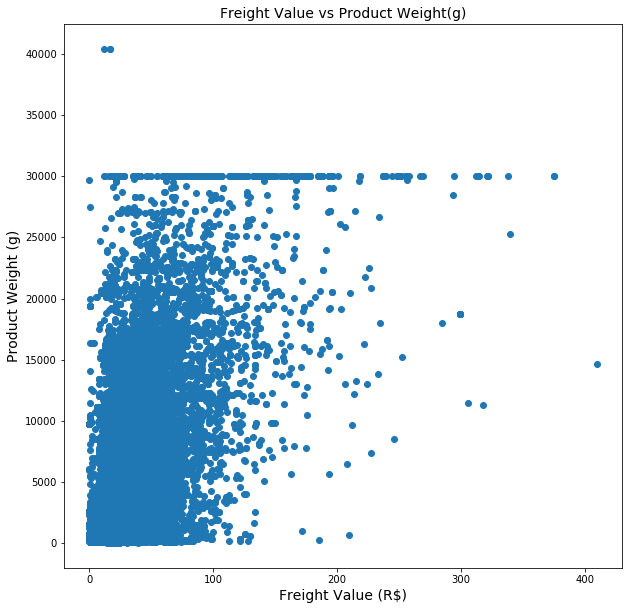

In [93]:
# plot frieght value + product weight
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(olist.freight_value,olist.product_weight_g)
ax.set_facecolor('white') #sets background to white
ax.set_xlabel('Freight Value (R$)', fontsize='14') # x label
ax.set_ylabel('Product Weight (g)', fontsize='14') # y label
ax.set_title('Freight Value vs Product Weight(g)', fontsize='14') # graph name
plt.show()

- **Product Height:** there are over 6,500 records with product height above 40cm, and 134 records with product height above or equal to 105cm, so we are confident these are  correct


In [94]:
# description
olist.product_height_cm.describe()

count    114079.000000
mean         16.606404
std          13.439302
min           2.000000
25%           8.000000
50%          13.000000
75%          20.000000
max         105.000000
Name: product_height_cm, dtype: float64

In [95]:
# the boxplot shows outliers above 40cm
olist[olist.product_height_cm>40].head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
8,771ee386b001f06208a7419e4fc1bbd7,206c0fcc717333d169ff95933fb47341,2017-06-23 13:11:27,2017-06-23 13:25:19,2017-06-26 17:33:37,2017-07-03 15:59:46,2017-07-17,9a3526eee723accd014ec683afe5bf20,31230,belo horizonte,...,1.0,7000.0,26.0,47.0,27.0,housewares,13206.0,jundiai,SP,81.16
25,4214cda550ece8ee66441f459dc33a8c,be4ecdb7c9401fd98ed01456634cfcb2,2017-03-21 17:39:19,2017-03-21 17:39:19,2017-03-22 10:26:53,2017-03-30 15:05:20,2017-04-25,79403f8240aafdd83128106b5b48fd43,68485,pacaja,...,1.0,3045.0,55.0,60.0,30.0,baby,85603.0,francisco beltrao,PR,170.57
46,f9d0ec2fa088ac583e1ccd15b6686073,2b9c9e251dbb2a2a768fd48fbf151e4c,2017-02-28 15:19:04,2017-02-28 19:18:23,2017-03-03 13:46:45,2017-03-14 17:29:09,2017-03-29,35aebf263a4418be92141cc28421c0e0,32150,contagem,...,1.0,4225.0,45.0,55.0,16.0,office_furniture,8577.0,itaquaquecetuba,SP,89.68
67,e8977f709bbb0367f51b589e6325f991,b7f69471fed8a036911323fca290a2c2,2017-11-13 21:37:15,2017-11-13 21:50:33,2017-11-14 22:38:39,2017-11-16 19:25:51,2017-11-27,5ceed695eeb968efc7959d859a902e00,8771,mogi das cruzes,...,1.0,17300.0,40.0,70.0,40.0,housewares,8275.0,sao paulo,SP,132.51
69,1ffb3c1929b16d9c1aec1958e11b3e9b,15e65458c1de2332a93656f2272c808e,2018-06-30 13:37:47,2018-07-05 16:27:01,2018-07-03 14:13:00,2018-07-09 20:41:43,2018-07-25,78fc10170ee499077d81e1ed7b03fe6e,6670,itapevi,...,7.0,5400.0,20.0,60.0,50.0,toys,81770.0,curitiba,PR,166.04


In [96]:
olist[olist.product_height_cm>=105].head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
833,9c0bd8cd0fc8231ed50c066058917360,2896914daa531536d8c68d2d9bf15198,2018-05-15 02:12:21,2018-05-15 02:35:31,2018-05-15 13:22:00,2018-05-16 17:08:59,2018-05-25,4d3ee61f36901469e814fa28a102edda,6266,osasco,...,4.0,11325.0,18.0,105.0,30.0,industry_commerce_and_business,7031.0,guarulhos,SP,132.68
1049,15623f35d6d5eaa2fcd185a613927e86,02548f54167adc674352fe5b7825ffcf,2018-04-18 19:04:52,2018-04-20 07:32:14,2018-04-26 09:29:00,2018-05-10 20:11:39,2018-05-21,93541741ba99116c5cf5773312eff953,78080,cuiaba,...,4.0,11325.0,18.0,105.0,30.0,industry_commerce_and_business,7031.0,guarulhos,SP,131.80
3185,7b4cc813e327ec14c78f547a763f46b8,725ba0268900143556050bd3513a3369,2018-03-08 15:59:45,2018-03-08 16:31:38,2018-03-15 19:46:25,2018-03-29 23:23:20,2018-03-29,6c1a470cc3b59370f0c874af9d0959dc,37540,santa rita do sapucai,...,3.0,10550.0,30.0,105.0,20.0,electronics,6162.0,osasco,SP,399.35
5071,9d32e14ab99f206e6f8f2b6ad13baabf,ff73a759cba534dba02faaffdeb00e61,2018-03-09 12:01:33,2018-03-09 12:15:33,2018-03-09 21:55:20,2018-04-03 20:26:24,2018-04-06,cf96f6830f6e50b7dcba257a163e465c,12701,cruzeiro,...,2.0,30000.0,42.0,105.0,47.0,sports_leisure,86600.0,rolandia,PR,434.24
5721,c5732e63477fd9b1c12f62ad4472fc6c,3dfe77e7e9e11249eab5f54ff0c8e26d,2018-01-18 01:16:32,2018-01-18 01:30:54,2018-01-19 20:46:50,2018-02-16 17:47:06,2018-03-12,831c086692f020a200828871ca93df1d,68901,macapa,...,2.0,7050.0,20.0,105.0,20.0,sports_leisure,13250.0,itatiba,SP,129.10


- **Product Length/ Product Width:**  both are very similar in terms of stats 
- **Product Length:** shows some possible outliers above 60cm, but it turns out there more than 6,000 records with length over 50cm. Also a the longest length of 105cm there are 311 rows, so we are confident these measurements are accurate

In [97]:
olist[['product_length_cm','product_width_cm']].describe()

,product_length_cm,product_width_cm
count,114079.000000,114079.000000
mean,30.289738,23.105208
std,16.157570,11.739518
min,7.000000,6.000000
25%,18.000000,15.000000
50%,25.000000,20.000000
75%,38.000000,30.000000
max,105.000000,118.000000


In [98]:
# boxplot shows something going on above 60cm in length
olist[olist.product_length_cm>60].head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
45,595f598849d89203c28d05d0fbf3f92e,cefab390926b6fc3de3ca94c82ebb1ba,2017-09-25 16:38:46,2017-09-25 17:10:25,2017-09-27 17:09:40,2017-10-02 20:55:55,2017-10-19,bf635aadfff238fd7e9b0d25e800d019,5171,sao paulo,...,1.0,7000.0,70.0,21.0,16.0,furniture_decor,15075.0,sao jose do rio preto,SP,26.58
138,243312dbb316253ab77bb0140d94803c,680e38a70d371582570f41cc47dc2791,2018-03-17 08:21:08,2018-03-17 08:49:39,2018-03-19 19:12:11,2018-03-21 12:24:26,2018-04-05,713110abe5de675d1513356694fe095a,13503,rio claro,...,1.0,11600.0,65.0,19.0,47.0,cool_stuff,3821.0,sao paulo,SP,285.79
186,14c0c0bebe2cd50fb1dbdee84fbae03a,7ac0cc6086ab6987cb2bf47141b2288a,2018-01-04 14:05:07,2018-01-04 14:15:30,2018-01-08 20:46:20,2018-01-17 16:42:05,2018-01-29,43fee0c28d0149eef54898d1d877a3e2,13635,pirassununga,...,1.0,6400.0,63.0,11.0,63.0,auto,7112.0,guarulhos,SP,180.55
189,53035288acc866ee15423b4293722b46,12ea47b284521261ac272de65bbb3506,2018-01-19 09:43:55,2018-01-19 09:53:17,2018-01-19 19:06:48,2018-02-08 23:39:28,2018-02-21,b2d586d74e65779de4810d7e17d33a6f,60115,fortaleza,...,3.0,14600.0,84.0,8.0,84.0,furniture_decor,36500.0,uba,MG,375.74
230,c1b770015e27aaf2b475026989d04fe0,86c0159e4a9735e1a0ab95bf4c7958f1,2017-12-11 11:40:32,2017-12-12 03:56:25,2017-12-18 21:52:53,2017-12-19 12:34:57,2017-12-28,9f6ab3755da328c4f8c77b8c7a642177,85807,cascavel,...,3.0,2450.0,105.0,3.0,70.0,furniture_decor,85802.0,cascavel,PR,137.73


In [99]:
olist[olist.product_length_cm==105].head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
230,c1b770015e27aaf2b475026989d04fe0,86c0159e4a9735e1a0ab95bf4c7958f1,2017-12-11 11:40:32,2017-12-12 03:56:25,2017-12-18 21:52:53,2017-12-19 12:34:57,2017-12-28,9f6ab3755da328c4f8c77b8c7a642177,85807,cascavel,...,3.0,2450.0,105.0,3.0,70.0,furniture_decor,85802.0,cascavel,PR,137.73
236,afd0dbbab8e90d099aaccdd8ed7d5f26,6ce21a80311ab8b07f36944962b01681,2018-06-14 17:20:31,2018-06-14 17:40:01,2018-06-15 13:05:00,2018-06-18 21:22:15,2018-06-28,d1c191b64557c7c27229ac1bc45c2507,81260,curitiba,...,8.0,9350.0,105.0,15.0,28.0,sports_leisure,83605.0,campo largo,PR,269.46
627,dd3d73f70b77e2a07f64360620621ca4,38f1fb4bd44289ca591479b76905cdbf,2018-01-02 09:45:15,2018-01-02 09:54:22,2018-01-02 17:19:20,2018-01-04 12:41:45,2018-01-18,628bdd93abd27fbdd50f4e2e91ec64b3,4616,sao paulo,...,1.0,1500.0,105.0,4.0,15.0,furniture_decor,4696.0,sao paulo,SP,262.94
743,906f47e5cb0a80530bf2e789e6e6a0cd,c0c2bf66c5b4f939ddc5b00d504b6ebb,2018-06-11 14:57:36,2018-06-11 15:19:47,2018-06-12 13:08:00,2018-06-19 23:48:40,2018-06-28,2665614dba3f17c76aafc27613cd6361,11250,bertioga,...,2.0,27000.0,105.0,18.0,35.0,industry_commerce_and_business,7074.0,guarulhos,SP,179.92
771,539a1383b0bd9b963044945e607f1aca,3ae277cd8512be9edcf79c749218d3a0,2018-04-02 23:12:00,2018-04-02 23:28:03,2018-04-04 21:58:25,2018-04-13 23:08:48,2018-04-20,60c3be08ced32a29639cae284b204bb1,25956,teresopolis,...,4.0,250.0,105.0,13.0,13.0,watches_gifts,13170.0,sumare,SP,188.06


- **Product Width:**
    - Based on the boxplot where outliers seem to start above 50cm, there are nearly 2,900 records with widths over 50cm so they aren’t considered outliers.
    - At the max of 105cm width we show 13 records, so again we are confident these measurements are accurate


In [100]:
olist.product_width_cm.describe()

count    114079.000000
mean         23.105208
std          11.739518
min           6.000000
25%          15.000000
50%          20.000000
75%          30.000000
max         118.000000
Name: product_width_cm, dtype: float64

In [101]:
olist[olist.product_width_cm>50].head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
119,de4090fd9b7900d46323b0c7c36b7128,6f750933c4466edfcd08b82f4ddfd920,2018-05-05 10:27:28,2018-05-05 10:35:22,2018-05-07 14:11:00,2018-05-11 23:58:49,2018-05-30,89d4ec26627e7fe35be69c0512748842,9330,maua,...,1.0,9950.0,47.0,20.0,60.0,housewares,37650.0,camanducaia,MG,121.45
147,c51dcdd98e1c413f3d394ffcb4656ed1,555c1dc901d3cae90a9d452d888865c5,2018-08-19 19:28:08,2018-08-20 12:55:30,2018-08-21 13:07:00,2018-08-25 15:28:33,2018-08-31,0748f90b4f757729bbbc4d1ea60a0757,3942,sao paulo,...,1.0,5900.0,35.0,13.0,55.0,housewares,35501.0,divinopolis,MG,110.11
186,14c0c0bebe2cd50fb1dbdee84fbae03a,7ac0cc6086ab6987cb2bf47141b2288a,2018-01-04 14:05:07,2018-01-04 14:15:30,2018-01-08 20:46:20,2018-01-17 16:42:05,2018-01-29,43fee0c28d0149eef54898d1d877a3e2,13635,pirassununga,...,1.0,6400.0,63.0,11.0,63.0,auto,7112.0,guarulhos,SP,180.55
189,53035288acc866ee15423b4293722b46,12ea47b284521261ac272de65bbb3506,2018-01-19 09:43:55,2018-01-19 09:53:17,2018-01-19 19:06:48,2018-02-08 23:39:28,2018-02-21,b2d586d74e65779de4810d7e17d33a6f,60115,fortaleza,...,3.0,14600.0,84.0,8.0,84.0,furniture_decor,36500.0,uba,MG,375.74
211,1594012ccc1b0770373ce691d697e5ae,e957d597f76d275f40a848397fb6c7c3,2018-04-23 19:05:57,2018-04-24 19:17:00,2018-04-24 12:48:39,2018-04-27 22:08:35,2018-05-08,ccc2dbe64dde140fb3dbb127091e50a9,9530,sao caetano do sul,...,4.0,5967.0,48.0,37.0,53.0,bed_bath_table,14940.0,ibitinga,SP,362.17


In [102]:
olist[olist.product_width_cm==105].head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
7487,fc1d26c4d0639d4e8f684b618b355146,a6314abf76ef0a93e6821a5e9c925de1,2017-06-04 16:07:59,2017-06-04 16:22:09,2017-06-05 14:05:56,2017-06-06 09:10:56,2017-06-19,0b2b77a2b299cdd32e3ff49631232369,4016,sao paulo,...,3.0,600.0,50.0,8.0,105.0,health_beauty,3655.0,sao paulo,SP,239.45
24812,278b6dc641ac6cf9abcfb8b2aa95a0d0,28e769bf73caf3dc734588072640486c,2017-02-01 15:41:43,2017-02-01 15:50:11,2017-02-02 08:50:00,2017-02-13 07:38:37,2017-03-20,622db09504308011ed01e179e89d0925,45400,valenca,...,3.0,600.0,50.0,8.0,105.0,health_beauty,3655.0,sao paulo,SP,221.84
31171,4abe45d3258a19bc521cdd64b940acf1,9fad0cbea18c67d95c21db7c76670226,2017-06-20 21:01:58,2017-06-20 21:15:14,2017-06-29 16:57:25,2017-07-04 13:35:39,2017-07-04,4b0f4c2619f2f9ca0695227953e5f3ed,8420,sao paulo,...,2.0,5000.0,45.0,14.0,105.0,musical_instruments,9720.0,sao bernardo do campo,SP,410.03
53493,d5d5a70a76401ecc139ee16c5299df4d,11529689a3fdf79b53cf853daf570b16,2018-05-23 20:29:40,2018-05-23 20:57:21,2018-05-24 15:14:00,2018-05-30 17:21:33,2018-06-11,1b5a1fb128d2fb23ffc39090575c46ad,13219,jundiai,...,4.0,25000.0,27.0,23.0,105.0,cool_stuff,3087.0,sao paulo,SP,693.59
73741,cdd55639e282b90007cac9a8ea6a7798,6065fad852344e668bc2352e47d3db07,2017-10-20 16:53:16,2017-10-20 17:14:09,2017-10-20 22:32:49,2017-10-26 19:18:11,2017-11-01,d26c18f646566e96348d5782c71d9453,5884,sao paulo,...,1.0,5850.0,40.0,9.0,105.0,musical_instruments,9720.0,sao bernardo do campo,SP,509.81


- **Product Name Length** and **Product Description Length** are descriptors of the products and populated by the sellers, they can be as detailed as they want or not
- **Product Photos Qty:** is the number of photos associated with a product, again this is entirely up the seller depending on how descriptive they want to be
- **Product Weight:** as charted above in the boxplot matrix does something interesting around 30k grams, it just seems to cutoff
    - The smallest weights are: 0, 2, 25, 50 and 53 grams
    - There are 13 records with a weight of 0 or 2 grams and when we look at the means of the items we get
    - Price: R$135.62
    - Freight Value: R\\$22.92
    - Height: 19.62cm
    - Width: 38.46cm
    - Length: 22.69cm
    - Categories: best_bath_table, funiture_decor, stationary
        - Note: while stationary may weigh 2g, we are suspicious that all of these are mistakes so we are going to remove them from the dataset
    - The other numbers that jump out are the gap between about 30kg and 40kg,
        - There are 312 records with product weights above 29kg
        - There are 3 records with product weights above 40kg, they are all in the bed_bath_table category and that sounds reasonable


In [103]:
# what are the smallest values in the weight column
olist.nsmallest(1000, 'product_weight_g')['product_weight_g'].unique()

array([ 0.,  2., 25., 50., 53., 54., 55., 58., 60., 61., 63., 65., 67.,
       70., 75.])

In [104]:
# find those records with 0g or 2g of weight (the lowet 5 weights are 0, 2 , 25, 50, 53)
weights = range(0,2)
no_weight = olist[olist.product_weight_g.isin([0,2])]
no_weight[['order_id', 'product_id','product_weight_g', 'order_item_id']]

# only 2 where part of multi-item orders, I have to think anything with less than 25g in weight is a mistake, let's remove those


,order_id,product_id,product_weight_g,order_item_id
30912,06d9e69034388abf6da64378e10737b8,36ba42dd187055e1fbe943b2d11430ca,0.0,1.0
30913,06d9e69034388abf6da64378e10737b8,36ba42dd187055e1fbe943b2d11430ca,0.0,2.0
32253,4abc7b5330425bcf9c2f7f48151a88c0,8038040ee2a71048d4bdbbdc985b69ab,0.0,1.0
33522,a12196b6febf252a10f39f6d76ac0a8d,7ddb76f2c7237acc852358b95e7946a8,2.0,1.0
52071,476b812a7e4fc972646eb390517bddcb,e673e90efa65a5409ff4196c038bb5af,0.0,1.0
53868,3f50858a49c788f7633204f2fd7bf63f,f9fafac43d3416d92ecc303fdeb1743d,2.0,1.0
69086,d1129445a7d52481f5cd8c9198d4957e,5837bba0ce6e35e6f2dc5c3e223e3276,2.0,1.0
76981,62e27d060f7d7b3d2fd424b0e1d7adaa,ad7d07f5775feab3f20504d1ad3fff11,2.0,1.0
82810,200b121c28e10ef638131a7c76753327,81781c0fed9fe1ad6e8c81fca1e1cb08,0.0,1.0
87152,5ed3cdc2df4c7cb624fc3ac0f66d4a02,8aae4df46baf1278422b69edbb50bd35,2.0,1.0


In [105]:
no_weight

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
30912,06d9e69034388abf6da64378e10737b8,afef0047e43944e8c6630ec0d0f7de2e,2018-07-30 10:42:40,2018-07-31 09:10:11,2018-07-31 14:24:00,2018-08-09 22:18:29,2018-09-10,7dff353845a1d77a928dcb952c6bc966,45653,ilheus,...,1.0,0.0,30.0,25.0,30.0,bed_bath_table,14940.0,ibitinga,SP,123.85
30913,06d9e69034388abf6da64378e10737b8,afef0047e43944e8c6630ec0d0f7de2e,2018-07-30 10:42:40,2018-07-31 09:10:11,2018-07-31 14:24:00,2018-08-09 22:18:29,2018-09-10,7dff353845a1d77a928dcb952c6bc966,45653,ilheus,...,1.0,0.0,30.0,25.0,30.0,bed_bath_table,14940.0,ibitinga,SP,123.85
32253,4abc7b5330425bcf9c2f7f48151a88c0,d1568f1104d2015dc70bdf7d9ab88dd2,2018-07-31 21:05:49,2018-07-31 21:40:18,2018-08-01 16:00:00,2018-08-07 23:56:48,2018-08-17,93b52b7591ca73fc44cdac70146a1b0d,4904,sao paulo,...,1.0,0.0,30.0,25.0,30.0,bed_bath_table,14940.0,ibitinga,SP,144.39
33522,a12196b6febf252a10f39f6d76ac0a8d,a2a2b3024be00dfdd15cae8f8c526076,2018-03-10 12:45:26,2018-03-10 12:55:51,2018-03-13 16:12:41,2018-03-23 16:08:48,2018-03-29,050d3f286778f86639cf514104c1bb8c,83326,pinhais,...,2.0,2.0,11.0,11.0,52.0,stationery,6764.0,tabao da serra,SP,145.79
52071,476b812a7e4fc972646eb390517bddcb,18a1176652a9344ba489fa4ccaa3c20f,2018-08-18 11:09:12,2018-08-18 11:30:54,2018-08-21 12:07:00,2018-08-30 16:56:44,2018-09-12,387207b587c829c6678a03c8b711ae1e,72911,aguas lindas de goias,...,1.0,0.0,30.0,25.0,30.0,bed_bath_table,14940.0,ibitinga,SP,153.61
53868,3f50858a49c788f7633204f2fd7bf63f,b5d131af7951f37c72c8439e2eb9bf0b,2018-04-08 18:40:10,2018-04-09 18:35:17,2018-04-10 20:56:47,2018-04-25 20:48:56,2018-04-26,0cbaa74a511e52c7470f2c85f2ebd559,31578,belo horizonte,...,2.0,2.0,11.0,11.0,52.0,furniture_decor,6764.0,tabao da serra,SP,352.02
69086,d1129445a7d52481f5cd8c9198d4957e,f215bd697983e112b9b42330cf503c50,2018-06-20 19:41:16,2018-06-21 16:20:08,2018-06-27 17:22:00,2018-06-29 19:08:22,2018-07-05,11db78ab36d352319ed0e1ad277edf97,9540,sao caetano do sul,...,2.0,2.0,11.0,11.0,52.0,furniture_decor,6764.0,tabao da serra,SP,198.68
76981,62e27d060f7d7b3d2fd424b0e1d7adaa,ebc37754efcd5ef1954d9980073a6c00,2018-04-09 20:14:31,2018-04-09 20:30:14,2018-04-10 21:14:36,2018-04-16 19:55:33,2018-05-02,06b94cd5fa83f543bfa02bd8f18b56d1,26435,japeri,...,2.0,2.0,11.0,11.0,52.0,furniture_decor,6764.0,tabao da serra,SP,108.51
82810,200b121c28e10ef638131a7c76753327,26bcca10e5c9679c306d8333bf527929,2018-08-04 15:55:59,2018-08-04 16:10:16,2018-08-08 14:35:00,2018-08-23 18:21:59,2018-08-30,7e518b9896c26844bf24c1802c7d8775,75830,mineiros,...,1.0,0.0,30.0,25.0,30.0,bed_bath_table,14940.0,ibitinga,SP,119.89
87152,5ed3cdc2df4c7cb624fc3ac0f66d4a02,4a8ce9a8cb458c67086e351552936cd2,2018-06-07 22:36:58,2018-06-07 22:56:02,2018-06-11 18:22:00,2018-06-21 18:17:37,2018-07-16,abd388edf0df9d046ec7236bc00e89ce,95020,caxias do sul,...,2.0,2.0,11.0,11.0,52.0,furniture_decor,6764.0,tabao da serra,SP,129.60


In [106]:
no_weight.price.mean()

135.6192307692308

In [107]:
no_weight.freight_value.mean()

22.920769230769228

In [108]:
# get the order_id's so we can just dump them
index = no_weight.index
index


Int64Index([ 30912,  30913,  32253,  33522,  52071,  53868,  69086,  76981,
             82810,  87152,  93897,  93898, 118529],
           dtype='int64')

In [109]:
#drop those indexes from the data set
olist=olist.drop(index=index, axis=0)


###### Large Weights

In [110]:
# explore those weights around 30kg-40kg
weights = olist[olist.product_weight_g>29000]


In [111]:
weights[weights.product_weight_g>30000]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
43485,4a45f9f66971302cf881ecfa142f42ba,ccd6a4af78390b7ae560c1cc1cb1a2ff,2017-12-23 19:03:24,2017-12-23 19:13:20,2017-12-28 15:13:58,2018-01-25 22:17:15,2018-01-29,32d0420a22921ea161d8bff0e0297b71,88820,icara,...,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,14940.0,ibitinga,SP,96.32
45058,6ecf1a4051b4c5ed613624b460970a26,958279c23050d6207d196c3057648f6f,2017-11-17 08:40:57,2017-11-17 08:55:48,2017-11-17 20:36:56,2017-12-01 12:08:23,2017-12-06,de00290d2a997f24e1706fdc2d366a0e,11730,mongagua,...,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,14940.0,ibitinga,SP,92.06
102268,9223919b300f6989e1715333fca0d6ce,51934b734e94e61d8efa4523e175c6c3,2018-03-01 23:05:31,2018-03-01 23:15:32,2018-03-02 22:33:58,2018-03-27 20:47:27,2018-03-26,4fbb5c68b6851f6e35c543f963b43e4c,86455,joaquim tavora,...,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,14940.0,ibitinga,SP,96.32


- **Total Order Amount:** total order amount = price + freight value (shipping), so it is not surprising that this column follows the price column very closely and based on the findings that there aren’t any outliers in price we are confident this attribute is ok as is.

# <span style="color:blue"> 4. Simple Statistics </span>

In [112]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114067 entries, 0 to 119147
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114067 non-null  category      
 1   customer_id                    114067 non-null  category      
 2   order_purchase_timestamp       114067 non-null  datetime64[ns]
 3   order_approved_at              114067 non-null  datetime64[ns]
 4   order_delivered_carrier_date   114067 non-null  datetime64[ns]
 5   order_delivered_customer_date  114067 non-null  datetime64[ns]
 6   order_estimated_delivery_date  114067 non-null  datetime64[ns]
 7   customer_unique_id             114067 non-null  category      
 8   customer_zip_code_prefix       114067 non-null  category      
 9   customer_city                  114067 non-null  category      
 10  customer_state                 114067 non-null  category      
 11  

In [113]:
# describe dataframe
pd.options.display.max_columns = olist.shape[1] # this tells python to output all columns and not just the first 13
olist.describe(include="all").to_csv('Olist_Variable_Descriptions.csv')
print(olist.describe(include="all")) #tells python to include categorical variables + continuous variables


C:\Users\justi\.conda\envs\ML7331\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\justi\.conda\envs\ML7331\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\justi\.conda\envs\ML7331\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will 

                                order_id                       customer_id  \
count                             114067                            114067   
unique                             95124                             95124   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   
first                                NaN                               NaN   
last                                 NaN                               NaN   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                        

In [114]:
olist.payment_type.unique()

['credit_card', 'boleto', 'voucher', 'debit_card']
Categories (4, object): ['credit_card', 'boleto', 'voucher', 'debit_card']

****************************************
# <span style="color:blue"> 5. Visualize Attributes </span>
## <span style="color:blue"> a. Broad, high level visualization of the dataset </span>
- Below is another image of the boxplots of the data distribution for continuous attributes in the data set as we find that most are heavily skewed towards the top. 




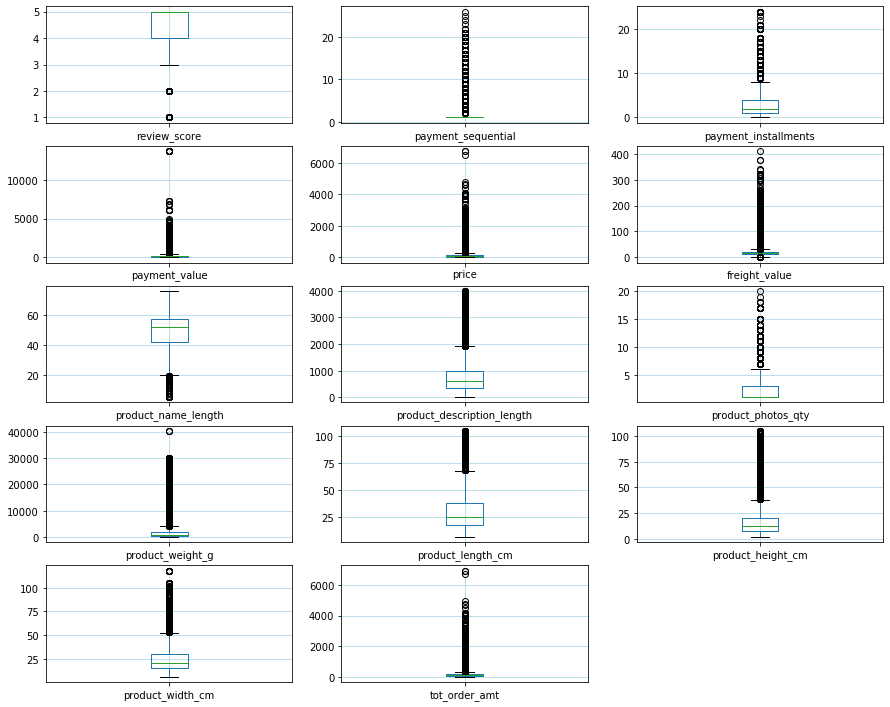

In [115]:
# boxplot of continuous variables
fig, ax = plt.subplots(figsize=(15,15)) #creat plot area

for index, plot_vars in enumerate(olist_cont): #plot_vars is a built-in function
    ax = plt.subplot(6,3, index+1) # nrows, ncols, index
    ax=olist_cont.boxplot(column=plot_vars) # fill with color
    ax.set_facecolor('white') #sets background to white
    ax.grid(color="lightblue")


plt.show()


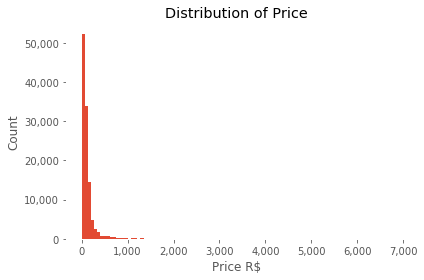

In [116]:
#Simple histogram plot of price distribution
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)
x= olist.price

ax.hist(x, bins=100)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')

plt.title('Distribution of Price') #labels
plt.xlabel('Price R$')
plt.ylabel('Count')

plt.show()

- Of particular interest are the skewed distribution shown for **price** related attributes (i.e. payment_value, price, feight_value). Figure 5B further displays the distribution as a histogram, showing strong skewness in the price data. The modeling tasks will strive to minimize the effect of this non-normality by scaling and/or transformation. 


In [117]:
reviews = pd.DataFrame(olist.groupby(by='review_score')['review_score'].count())
reviews.review_score

review_score
1.0    13348
2.0     3947
3.0     9642
4.0    21881
5.0    65249
Name: review_score, dtype: int64

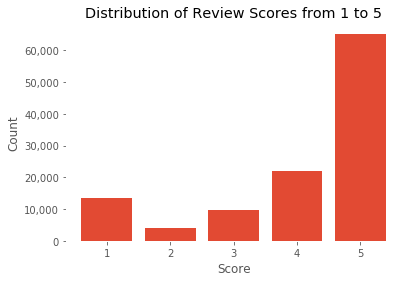

In [118]:
#Simple plot of review distribution
fig, ax = plt.subplots()
x= reviews.index
height= reviews.review_score

plt.rcParams['axes.facecolor'] = 'white'
ax.bar(x = x, height = height,align='center') #Specifying bin edges to make 5 categories. 

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
plt.title('Distribution of Review Scores from 1 to 5') #labels
plt.xlabel('Score')
plt.ylabel('Count')


plt.show()

- A bar chart plot of **review scores** indicates that most of the sampled customers provided very good reviews (5). This is a key finding for understanding customer satisfaction and how to improve on it because we can drill into what constitutes a high score vs a low score. 


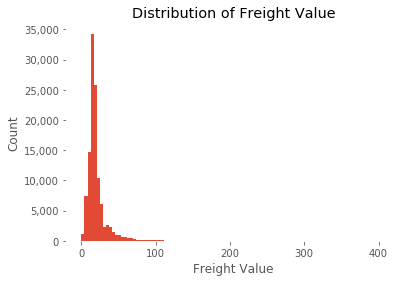

In [119]:
#Simple histogram plot of freight value distribution


fig, ax = plt.subplots()
x= olist.freight_value

ax.hist(x, bins=100)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
plt.title('Distribution of Freight Value') #labels
plt.xlabel('Freight Value')
plt.ylabel('Count')

plt.show()

- We see here that the distribution of **Freight Value** is very similar to the distribution of price with a heavy left skew, suggesting that we should consider transforming it.


In [120]:
payment = pd.DataFrame(olist.groupby(by='payment_type')['payment_type'].count())
payment = payment.rename({'payment_type' : 'count'})
payment['payment'] = payment.index
payment = payment.drop(payment.payment[3])
payment


,payment_type,payment
payment_type,,
boleto,22203,boleto
credit_card,84163,credit_card
debit_card,1633,debit_card
voucher,6068,voucher


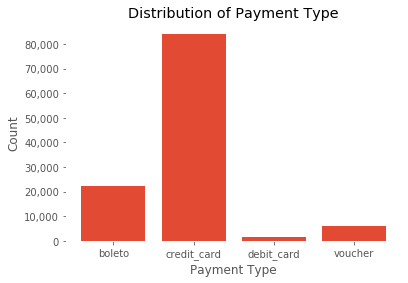

In [121]:
# distribution of Payment Type

fig, ax = plt.subplots()
x= payment.payment
height = payment.payment_type

ax.bar(x, height=height, align='center')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_xticklabels(x)

plt.title('Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

- We see that the majority of **payment types** made from 2016-2018 on olist were by credit card, followed by boleto (a direct payment method like a bank wire), then by voucher and debit card. 


In [122]:
# product categories
prodcat = pd.DataFrame(olist.groupby('product_category_english')['product_category_english'].count())
prodcat['category'] = prodcat.index
prodcat.columns = ['count','category']
prodcat = prodcat[['category','count']]
prodcat.reset_index(drop=True,inplace=True)
prodcat.head()


,category,count
0,agro_industry_and_commerce,246
1,air_conditioning,294
2,art,207
3,arts_and_craftmanship,24
4,audio,379


In [123]:
# pd.set_option("display.max_rows", None)
prodcat = prodcat.sort_values(by='count')
prodcat

,category,count
63,security_and_services,2
29,fashion_childrens_clothes,7
59,pc_gamer,9
11,cds_dvds_musicals,14
62,portable_kitchen_and_food_preparers,14
...,...,...
15,computers_accessories,7963
39,furniture_decor,8639
67,sports_leisure,8791
43,health_beauty,9814


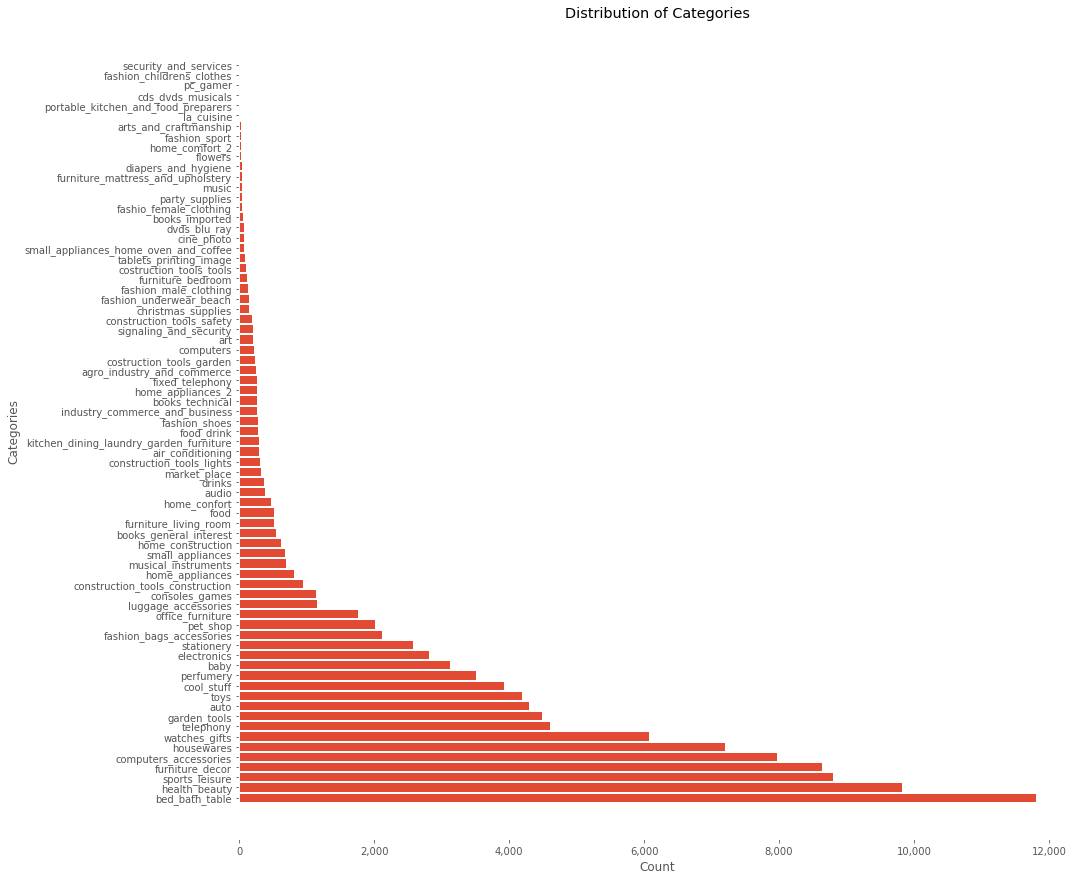

In [124]:
# Chart distribution of categories
fig, ax = plt.subplots(figsize=(15,15))
y = prodcat.category
y_pos = np.flip(np.arange(len(y)))
width = prodcat['count']

ax.barh(y_pos, width=width, align='center')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_facecolor('white')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)

plt.title('Distribution of Categories')
plt.ylabel('Categories')
plt.xlabel('Count')
plt.show()

- We explored how many products are in each category to give us an idea of what the biggest or possibly more diverse categories are. This will help us later on determine the best category to work with for our accurate price predictions. The largest category is bed_bath_table with 11,808 products, followed by health_beauty with 9,814 products and third is sports_leisure with 8,791 products. The smallest 3 categories in order from smallest to largest are security_and_services (2), fashion_childrens_clothes (7) and pc_gamer (9).


-------------------
# <span style="color:blue"> 6. Explore Joint Attributes </span>


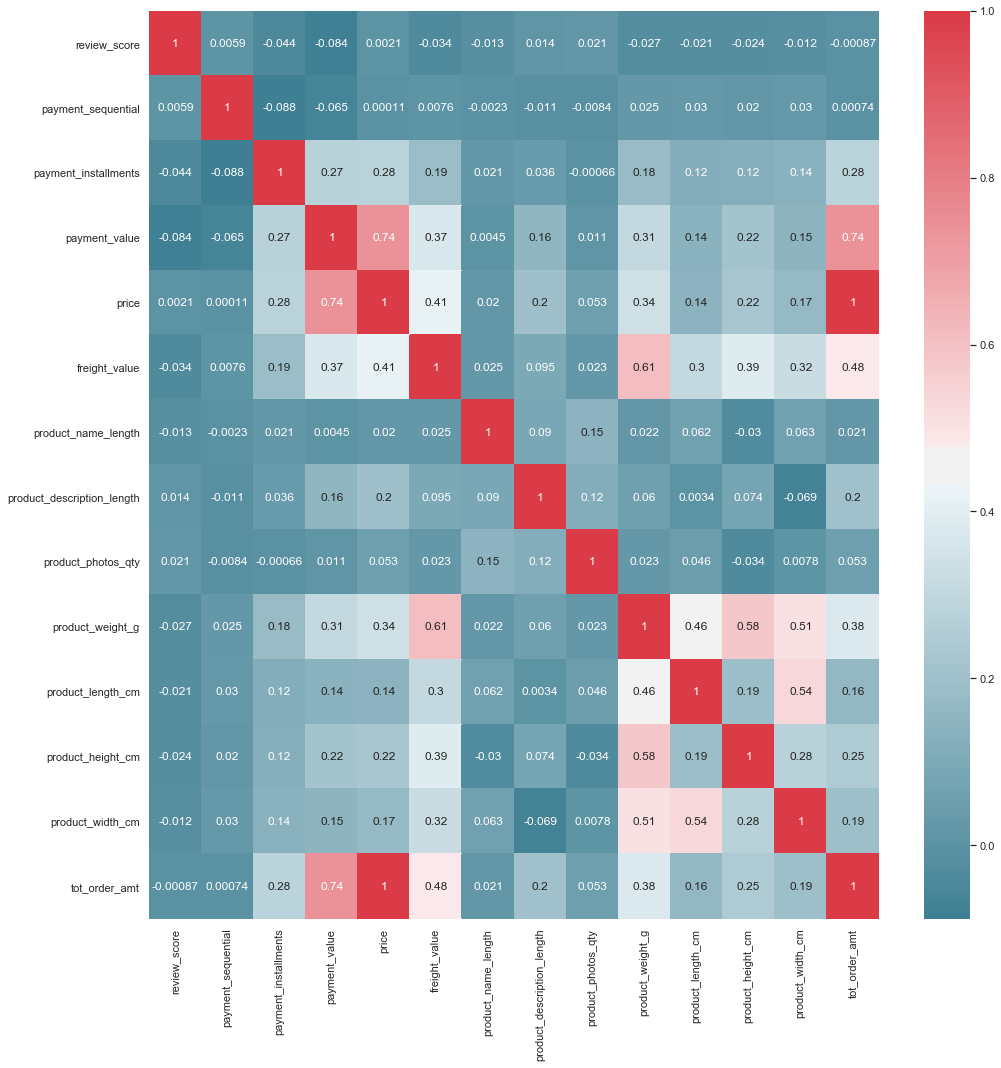

In [125]:
# let's try a heatmap
# plot the correlation matrix using seaborn 
# sns.corrplot() was depricated with v0.6!!!
sns.set(style="darkgrid") # one of the many styles to plot using

cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(olist.corr(), cmap=cmap, annot=True)

f.tight_layout()

**Correlation heatmap for the numerical attributes in the Olist dataset.**
- **Review Score** score does not appear to be highly correlated with any of the other variables
- **Payment Value** and **Price** are highly correlated because Payment Value = Price + Freight - Voucher
- **Payment Value** and **Total Order Amount** are also highly correlated, Payment Value is a portion of Total Order Amount or the entire amount if no vouchers are used in the payment process.
- **Price** and **Freight Value** 0.42: not too highly correlated so cost doesn’t necessarily dictate shipping cost
- **Product Weight** and **Freight Value** are highly correlated at 0.61, that makes sense because shipping costs are based on weight, package size, distance and type of shipping if that’s any option.
- Interesting that the **Product Length**, **Width** and **Height** are not highly correlated with Freight Value, but they are correlated with Product Weight
- **Product Length** and **Width** also appear to be correlated with each other, we may consider merging the H+W+L into one attribute called Volume to reduce the overall number of attributes
- **Total order amount** and **product description(s)**: There does not appear to be a strong association between price and the product descriptions (title length, description length, quantity of photos), but we suspect that there might be a correlation between the number of items sold by sellers and the length of the product title, description and the number of photos associated with a listing
- **Price** and **payment instalments** do not appear to be highly correlated either, that could be due to most people paying for entire orders up front in one payment vs electing to make multiple payments.
- **Price** and **Payment Sequential** similarly are not highly correlated and that makes it seem like more people are paying with a single payment method.


In [126]:
#date features: day of week and month of order_purchase using purchase timestamp. Further converted to categorical data type.
olist['purchase_wk_day'] = olist.copy()['order_purchase_timestamp'].dt.day_name().astype('category')

olist['purchase_wk_day'].unique()

['Wednesday', 'Tuesday', 'Monday', 'Friday', 'Sunday', 'Thursday', 'Saturday']
Categories (7, object): ['Wednesday', 'Tuesday', 'Monday', 'Friday', 'Sunday', 'Thursday', 'Saturday']

In [127]:
# create a column for purchase month in regular english
olist['purchase_month'] = olist.copy()['order_purchase_timestamp'].dt.month_name().astype('category')

olist['purchase_month'].unique()

['April', 'June', 'December', 'May', 'July', ..., 'March', 'January', 'September', 'October', 'February']
Length: 12
Categories (12, object): ['April', 'June', 'December', 'May', ..., 'January', 'September', 'October', 'February']

In [128]:
# number of records per month
olist['purchase_month'].value_counts()

August       12348
May          12270
July         11868
March        11280
June         10965
April        10683
February      9660
January       9184
November      8761
December      6328
October       5761
September     4959
Name: purchase_month, dtype: int64

In [129]:
# subset months and price (month spent on items, not including shipping)

olist_sub = olist[['price','purchase_month']]

month_price = olist_sub.groupby(by='purchase_month').sum()
month_price = month_price.sort_values(['price'])
month_price

,price
purchase_month,
September,640081.48
October,704399.57
December,739558.09
November,1017007.79
January,1064546.50
February,1095760.81
June,1338495.70
April,1352090.09
March,1357340.47


In [130]:
month_price.index.values

['September', 'October', 'December', 'November', 'January', ..., 'April', 'March', 'July', 'August', 'May']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']

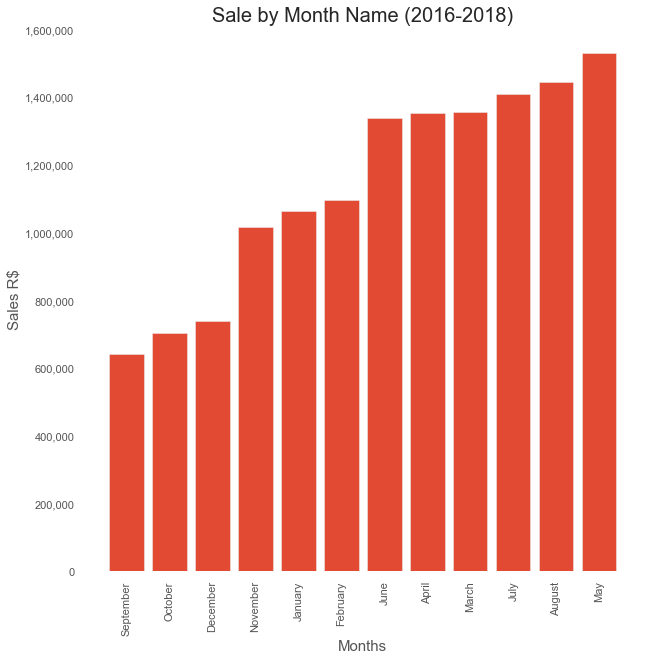

In [131]:
# plot some of these continuous varialbes
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,10), facecolor='w') # create figure on an axes, determine size
ax.bar(month_price.index.values, month_price.price, label="linear") # plot the data month_price created above in barchart
plt.xticks(month_price.index.values, month_price.index.values, rotation='vertical') # makes xticks vericle vs horizontal
ax.set_facecolor('white') #sets background to white
ax.set_xlabel('Months', fontsize='15') # x label
ax.set_ylabel('Sales R\\$', fontsize='15') # y label
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Sale by Month Name (2016-2018)', fontsize='20') # graph name
plt.show()

- Based  on an article  we found from [Latin America Business Stories](https://labsnews.com/en/articles/ecommerce/brazil-ecommerce-shopping-dates/) written on July 31, 2018, towards the end of our dataset, these trends can be explained as follows:Important dates: Consumers Day March 15th
- **April:** Free Shipping Day - last Friday in April, but in 2017 (that our dataset covers) some sellers gave customers an extra day  of free shipping…this is important because according to research (not documented in the article), up to 90% of Brazilian consumers did not make an online purchase because of shipping costs
- **May:** Mother’s Day - the 2nd Sunday in May (also contributes to free shipping day sales) - ranked as the 2nd busiest ecommerce day in the country
- **June:** June 12th ‘Dia do Namorados’, Brazil’s Valentine’s Day (in 2018 the most popular categories were Beauty and Health, Fashion and Technology
- **August:** Father’s Day - 2nd Sunday in August, most popular categories are Fashion and Accessories (31%), Electronics (22%), Books (14%), Fragrances (9%) and the rest are Travel, Shoes, CDs, DVDs and others.
- **October:** Children’s Day - October 12th - a lot of companies release new items around Children’s Day, this gives both kids and sellers a preview of what the Christmas season will look like
- November: Black Friday/ Cyber Monday or Black Week events are increasingly popular in November with big discounts on things like home appliances (-15.28%), electronics (-11.26%), cosmetics (-10.38%) and fashion (-10.35%)
- **November:** Chinese Double Eleven - November 11th. (basically celebrates Single’s Day), its a shopping day with deep discounts
- **December:** Christmas -  the 13th paycheck is sort of a bonus that all registered workers are entitled to


In [132]:
# let's break up the Discrepancy variable
#But needs outliers to be removed
olist['review_score_class'] = pd.cut(olist['review_score'],
                                                 [0, 2, 3, 5],
                                                 3,
                                                 labels=['bad','fair','good']) # this creates a new variable
olist['review_score_class'] = olist.copy()['review_score_class'].astype("category")
olist.review_score_class.head()

0     bad
1    good
2    good
3    good
4    good
Name: review_score_class, dtype: category
Categories (3, object): ['bad' < 'fair' < 'good']

C:\Users\justi\.conda\envs\ML7331\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


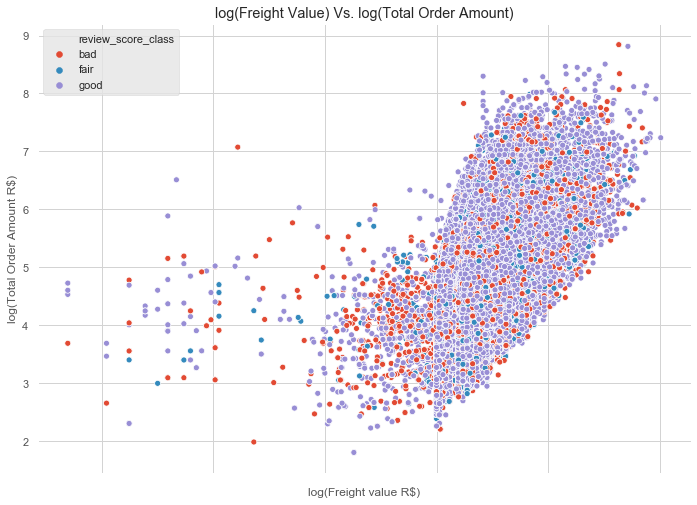

In [133]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.scatterplot(x = np.log(olist.freight_value), 
                     y = np.log(olist.tot_order_amt), 
                     hue = olist.review_score_class,
                     hue_order = ['bad','fair','good'] )
ax.set_facecolor("white")
ax.grid(color="lightgrey")
ax.set(xlabel = 'log(Freight value R\\$)', 
       ylabel = 'log(Total Order Amount R\\$)', 
       title = 'log(Freight Value) Vs. log(Total Order Amount)')
var = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

**log(Freight Value) Vs. log(Total Order Amount)**
The correlation heatmap shows that total order amount and freight values have a relatively good association (correlation coefficient = 0.48), however the shape of the scatterplot of their raw values did not show this relationship. Therefore, these attributes were log transformed as shown above. The log transformed plot depicts a positive linear association from log of freight value 0 and 2. Log of freight value is relatively invariant for lower values. The plot does not show an apparent trend for reviews score in total amount and freight value. 


Looks like price correlates with payment_value
Product_weight_g with freight_value
product_height with weight
product_width with weight
product_length with width


Business Objective EDA

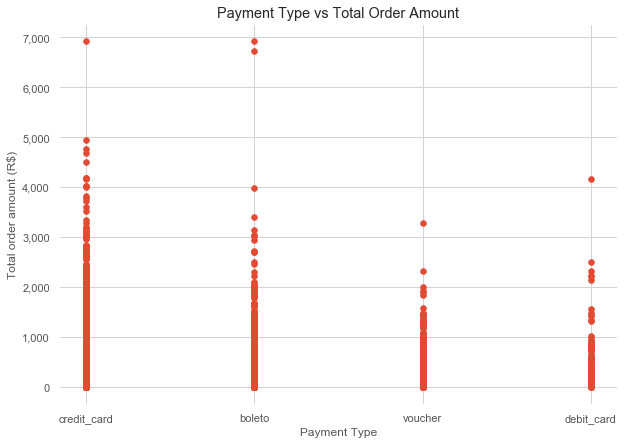

In [134]:
# payment method vs price
fig, ax = plt.subplots(figsize=(10,7)) 

ax.scatter(olist.payment_type.astype(str), olist.tot_order_amt)
ax.set_facecolor('w')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(color='lightgrey')

plt.title("Payment Type vs Total Order Amount")
plt.xlabel("Payment Type")
plt.ylabel("Total order amount (R$)")
plt.show()

**Payment Type and Price**
- A plot of payment method versus total amount paid for the order indicates that credit card payment is the most popular method for amounts higher than R\\$ 3,000 and as noted earlier, credit cards are the most popular payment method.


**Compare estimated delivery with actual delivery duration**

**select important attributes**

- order_purchase_timestamp = purchase initiation timestamp
- order_approved_at = payment approval timestamp
- order_delivered_customer_date = actual order delivery date to the customer
- order_estimated_delivery_date = estimated delivery date provided to the customer at the time of purchase initiation

**Objective**
- A more accurate estimated delivery date helps the customer to make informed decision.
- Proposal: Estimated delivery date that is +/- 3 days of actual delivery date should be considered a great delivery estimate.

In [173]:
#Obtain delivery duration for both actual and estimated
olist["order_delivery_actual_duration"] = olist["order_delivered_customer_date"] - olist["order_approved_at"]

In [174]:
olist["order_delivery_estimated_duration"] = olist["order_estimated_delivery_date"]-olist["order_delivered_customer_date"] 

In [175]:
#Round off the output to days.
olist["order_delivery_actual_duration"] = olist["order_delivery_actual_duration"].dt.days

In [176]:
#Round off the output to days.
olist["order_delivery_estimated_duration"] = olist["order_delivery_estimated_duration"].dt.days

In [177]:
#How far apart at the estimated and actual delivery duration
olist["delivery_estimate_discrepancy"] = olist["order_delivery_actual_duration"]-olist["order_delivery_estimated_duration"]


In [178]:
olist[['order_delivery_actual_duration','order_delivery_estimated_duration','delivery_estimate_discrepancy']]

,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy
0,13,12,1
1,3,16,-13
2,4,16,-12
3,14,13,1
4,14,13,1
...,...,...,...
119141,6,20,-14
119143,6,18,-12
119144,5,19,-14
119146,13,2,11


# <span style="color:blue"> 7. Explore Attributes and Class </span>
## <span style="color:blue"> Delivery Performance (classification task) </span>
- One of the main objectives of this project is to understand factors that are related to customer satisfaction as measured by review attributes (e.g., review_score, review_comments).

- As shown below, a relatively good correlation between delivery_estimate_discrepancy and review_score implies an association. The positive correlation suggests that customers that received their order earlier than the estimated delivery date tend to provide a high/good review_score. This relationship will be further explored during the modeling phase.


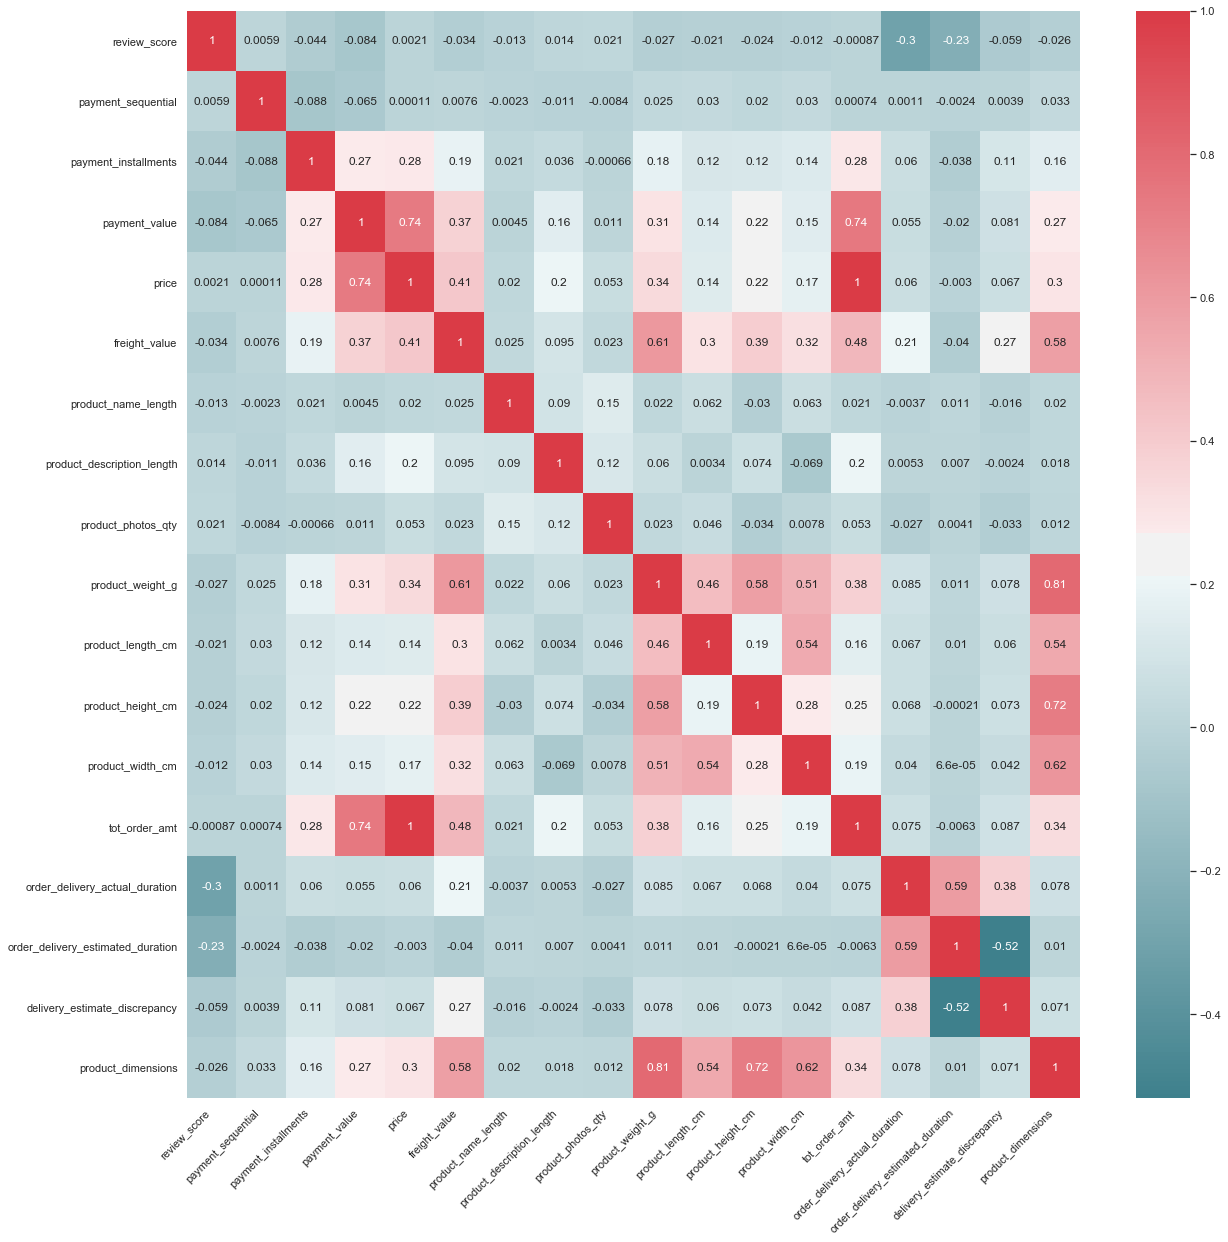

Correlation heatmap that shows linear relationship between delivery_estimate_discrepancy and other numerical attributes in the Olist dataset.


In [155]:
#Correlations
# let's try a heatmap
# plot the correlation matrix using seaborn 
sns.set(style="darkgrid") # one of the many styles to plot using

cmap = sns.diverging_palette(210, 10, as_cmap=True) # one of the many color mappings

f, ax = plt.subplots(figsize=(20,20))

sns.heatmap(olist.corr(), cmap=cmap, annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha="right")
plt.show()
print("Correlation heatmap that shows linear relationship between delivery_estimate_discrepancy and other numerical attributes in the Olist dataset.")

In [156]:
olist['product_dimensions'] = olist['product_length_cm'] * olist['product_height_cm'] * olist['product_width_cm']
olist.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,...,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt,purchase_wk_day,purchase_month,review_score_class,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00,1.0,credit_card,...,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction,13321.0,salto,SP,99.33,Wednesday,April,bad,13,-13,26,7803.0
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30,2018-07-03 11:23:16,1.0,credit_card,...,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,auto,4660.0,sao paulo,SP,24.39,Tuesday,June,good,3,-17,20,1056.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19,2017-12-22 17:55:30,1.0,credit_card,...,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,perfumery,9015.0,santo andre,SP,65.71,Tuesday,December,good,4,-17,21,3360.0
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21,2017-12-21 21:42:31,1.0,credit_card,...,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,bed_bath_table,13405.0,piracicaba,SP,107.78,Wednesday,December,good,14,-14,28,3080.0
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21,2017-12-22 01:10:39,1.0,credit_card,...,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,bed_bath_table,13405.0,piracicaba,SP,107.78,Wednesday,December,good,14,-14,28,3080.0


In [157]:
olist['delivery_estimate_discrepancy'].describe()

count    114067.000000
mean         23.616234
std           8.839660
min          -7.000000
25%          18.000000
50%          23.000000
75%          28.000000
max         154.000000
Name: delivery_estimate_discrepancy, dtype: float64

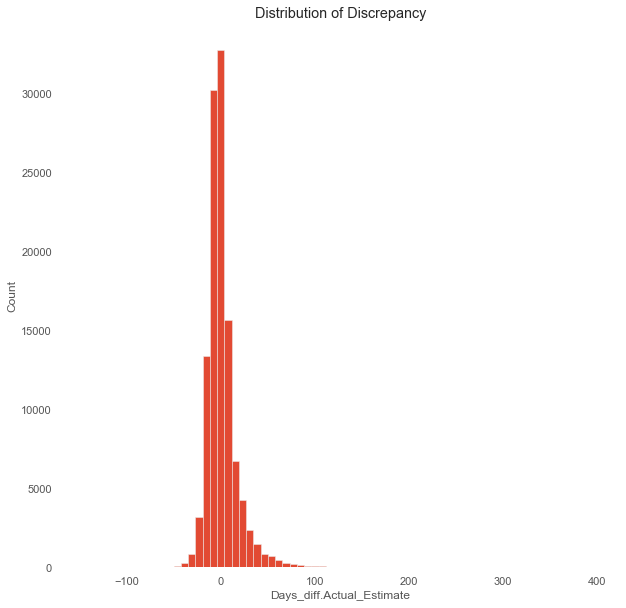

The data distribution for delivery estimate discrepancy is not normally distributed as  it shows a long-tailed distribution shape. This shape is due to the occurrence of outliers on both sides of the data distribution. In this case, setting a threshold value of 95% quantile of the delivery estimate discrepancy values was able to exclude these outliers and resulted in a more representative data distribution that is less skewed.


In [186]:
#Distribution of the discrepancy

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,10))
ax.hist(x=olist.delivery_estimate_discrepancy, bins = 70) #sets number of bins. Max price is 6.7K, so the graph is heavily skewed. 
ax.set_facecolor("white")
plt.title('Distribution of Discrepancy') #labels
plt.xlabel('Days_diff.Actual_Estimate')
plt.ylabel('Count')

plt.show()

#This shows a long tailed distribution likely because of the extreme min and max values.
print('The data distribution for delivery estimate discrepancy is not normally distributed as  it shows a long-tailed distribution shape. This shape is due to the occurrence of outliers on both sides of the data distribution. In this case, setting a threshold value of 95% quantile of the delivery estimate discrepancy values was able to exclude these outliers and resulted in a more representative data distribution that is less skewed.')

In [159]:
#What values form majority of our dataset. 
#What is our 50%, 80% and 90% quantile
np.quantile(olist['delivery_estimate_discrepancy'], 0.5), np.quantile(olist['delivery_estimate_discrepancy'], 0.8), np.quantile(olist['delivery_estimate_discrepancy'], 0.95)

#So any value different from 22 is outside 90% of the data series.

(23.0, 30.0, 38.0)

- Correlation heatmap shows that total order amount and freight values have a relatively good association (correlation coefficient = 0.48), however the shape of the scatterplot of their raw values did not show this relationship. Therefore, these attributes were log transformed (above). The log transformed plot depicts a positive linear association from log of freight value 0 and 2. Log of freight value is relatively invariant for lower values. The plot does not show an apparent trend for reviews score in total amount and freight value. 


In [160]:
estimate_discrepancy = olist.copy()['delivery_estimate_discrepancy'].quantile(0.95)

In [204]:
estimate_discrepancy = []
estimate_discrepancy_out = []

thresh = np.quantile(olist.copy()['delivery_estimate_discrepancy'], 0.95)

[estimate_discrepancy.append(i)
 if abs(i) <= thresh else estimate_discrepancy_out.append(i)
 for i in olist['delivery_estimate_discrepancy']]
y = np.array(y)


In [205]:
len(estimate_discrepancy), len(estimate_discrepancy_out)

(107905, 6162)

In [206]:
estimate_discrepancy,  estimate_discrepancy_out= np.array(estimate_discrepancy), np.array(estimate_discrepancy_out)

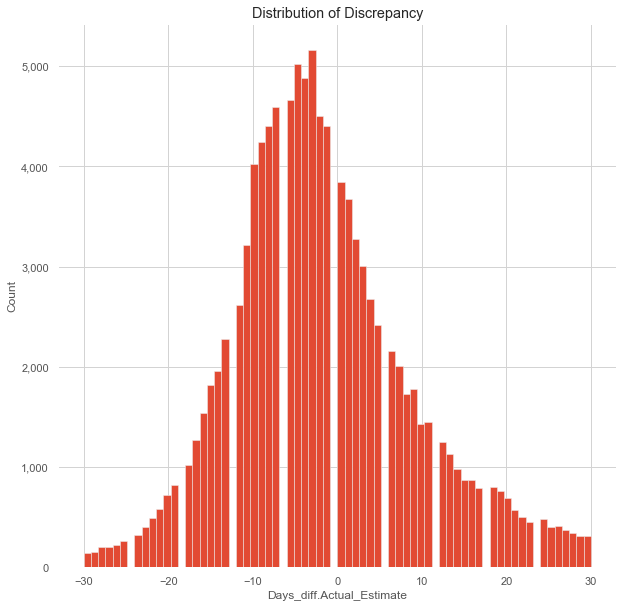

In [207]:
#Distribution of the discrepancy

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))

ax.hist(x=estimate_discrepancy, bins = 70) #sets number of bins. Max price is 6.7K, so the graph is heavily skewed. 
ax.set_facecolor('w')
ax.grid(color='lightgrey')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Distribution of Discrepancy') #labels
plt.xlabel('Days_diff.Actual_Estimate')
plt.ylabel('Count')

plt.show()

#This shows a long tailed distribution likely because of the extreme min and max values.

- **Distribution of Discrepancy:** the figure above is a histogram of 95% percentile of delivery estimate discrepancy data. In this case, setting a threshold value of 95% quantile of the delivery estimate discrepancy values was able to exclude these outliers and resulted in a more representative data distribution that is less skewed.


Text(0.5, 1.0, 'Distribution of Discrepancy')

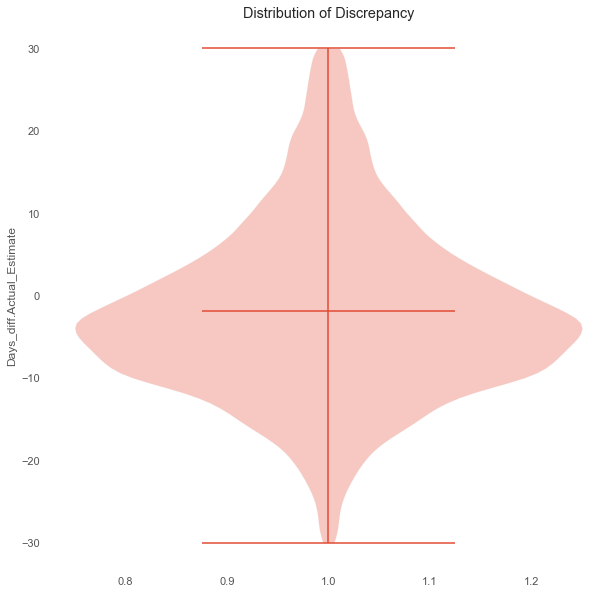

In [208]:
# violin plot
fig, ax = plt.subplots(figsize = (10,10))

ax.violinplot(estimate_discrepancy, showmeans=True)
ax.set_facecolor('w')
plt.ylabel('Days_diff.Actual_Estimate')
plt.title('Distribution of Discrepancy') #labels

- The violin plot above shows 95% percentile of distribution of delivery estimate discrepancy.


In [209]:
# let's break up the Discrepancy variable
#But needs outliers to be removed
olist['delivery_est_discrepancy_range'] = pd.cut(olist['delivery_estimate_discrepancy'],
                                                 [-500, -7, -4, 4, 7,500],
                                                 5,
                                                 labels=['too late','late','on target', 'early', 'too early']) # this creates a new variable
olist['delivery_est_discrepancy_range'].describe()

count       114067
unique           5
top       too late
freq         38220
Name: delivery_est_discrepancy_range, dtype: object

In [210]:
#Convert the new binned column into categorical levels.
olist['delivery_est_discrepancy_range'] = olist['delivery_est_discrepancy_range'].astype("category")
olist.delivery_est_discrepancy_range

0         on target
1          too late
2          too late
3         on target
4         on target
            ...    
119141     too late
119143     too late
119144     too late
119146    too early
119147    too early
Name: delivery_est_discrepancy_range, Length: 114067, dtype: category
Categories (5, object): ['too late' < 'late' < 'on target' < 'early' < 'too early']

In [211]:
# the cross tab operator provides an easy way to get these numbers
discr_review = pd.crosstab([olist['review_score']], 
                           olist['delivery_est_discrepancy_range'])#, normalize='index')
print (discr_review)

delivery_est_discrepancy_range  too late  late  on target  early  too early
review_score                                                               
1.0                                 3264  1091       2474    627       5892
2.0                                 1102   396        844    212       1393
3.0                                 2666  1096       2457    571       2852
4.0                                 6755  2800       6231   1505       4590
5.0                                24433  9188      18534   3674       9420


In [212]:
discr_review.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5 entries, 1.0 to 5.0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   too late   5 non-null      int64
 1   late       5 non-null      int64
 2   on target  5 non-null      int64
 3   early      5 non-null      int64
 4   too early  5 non-null      int64
dtypes: int64(5)
memory usage: 240.0 bytes


In [213]:
olist_subset = olist[['review_score', 'delivery_est_discrepancy_range']]
olist_subset.head()

,review_score,delivery_est_discrepancy_range
0,1.0,on target
1,5.0,too late
2,5.0,too late
3,5.0,on target
4,5.0,on target


In [214]:
olist_subset.groupby('delivery_est_discrepancy_range').mean()

,review_score
delivery_est_discrepancy_range,
too late,4.255651
late,4.276371
on target,4.228127
early,4.121111
too early,3.424608


# <span style="color:blue"> Key Findings </span>
- One notable observation from the Delivery Estimate Discrepency Range vs Review Score graph below is that customers that received their orders earlier than the estimated dates provided good review scores and vice versa for customers that received their orders late. This association deserves exploration to understand the nature of the relationship while noting any confounding variable.


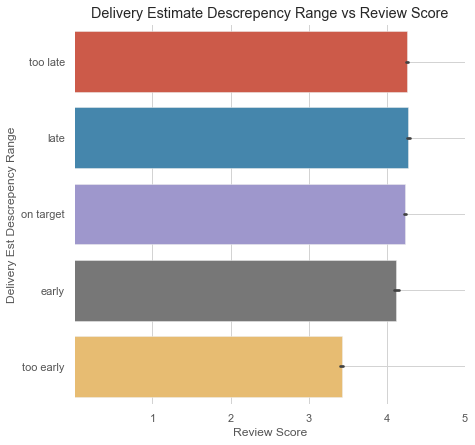

In [215]:
# plot Delivery Estimate Descrepency Range
fig, ax = plt.subplots(figsize=(7,7))
ticks = [1,2,3,4,5]
ax = sns.barplot(x='review_score', y = 'delivery_est_discrepancy_range', data = olist_subset)
ax.set(xlabel='Review Score', 
       ylabel='Delivery Est Descrepency Range',
      title='Delivery Estimate Descrepency Range vs Review Score')
ax.set_facecolor('white')
ax.grid(color="lightgrey")
plt.xticks(ticks)
plt.show()

- Bar plot for levels of delivery estimate discrepancy range and their  corresponding mean review scores to give us an idea of the relationship between the actual review score and the discrepancy between an estimated time of delivery and an actual time of delivery. More information for us to be able to help determine how to improve customer satisfaction in regards to logistic advancement.


- **Table 1** shows the distribution of delivery estimate discrepancy for respective months and corresponding review scores. It is normalized to show row proportions of the review scores.  
- From this table most of the processed orders are being delivered too early across all months of the year and even for some customers that provided low review scores. Despite the identified positive impact of early delivery, a major limitation to the practice is loss of sales from potential customers who view an estimated delivery date to be too long. These customers are not aware that, if placed, such orders might arrive 10 to 20 days earlier.  For this reason, it is more informative to provide an estimated delivery date that is within 4 days of actual delivery date.



In [196]:
# the cross tab operator provides an easy way to get these numbers
discr_review = pd.crosstab([olist['purchase_month'],olist['review_score']], 
                           olist['delivery_est_discrepancy_range'], normalize='index')

pd. get_option("display.max_columns")
print (color.BOLD + color.RED + "TABLE 1" + color.END)
discr_review.sort_values(by='purchase_month')

TABLE 1


delivery_est_discrepancy_range  too late      late  on target     early  \
purchase_month review_score                                               
April          1.0              0.328901  0.087766   0.189716  0.049645   
               2.0              0.353808  0.100737   0.191646  0.046683   
               3.0              0.332577  0.095346   0.236095  0.073780   
               4.0              0.352336  0.130374   0.242523  0.063551   
               5.0              0.442794  0.142158   0.240901  0.046352   
August         1.0              0.284715  0.075924   0.292707  0.060939   
               2.0              0.261097  0.122715   0.276762  0.083551   
               3.0              0.239631  0.119816   0.375576  0.073733   
               4.0              0.258413  0.125052   0.395098  0.083506   
               5.0              0.287424  0.131617   0.407465  0.073091   
December       5.0              0.432651  0.108740   0.211134  0.051053   
               3.0              0.314233  0.075786   0.203327  0.064695   
               4.0              0.330612  0.109388   0.215510  0.061224   
               1.0              0.221282  0.064087   0.157195  0.042322   
               2.0              0.261194  0.070896   0.149254  0.055970   
February       1.0              0.132111  0.048673   0.141593  0.039823   
               2.0              0.180000  0.100000   0.137500  0.052500   
               3.0              0.218550  0.098081   0.222814  0.043710   
               4.0              0.255343  0.107424   0.260405  0.080427   
               5.0              0.329907  0.111850   0.270859  0.072753   
January        1.0              0.289655  0.088793   0.185345  0.031034   
               2.0              0.304469  0.078212   0.220670  0.041899   
               3.0              0.328181  0.101070   0.193817  0.057075   
               4.0              0.381287  0.121637   0.232749  0.065497   
               5.0              0.467449  0.126491   0.217009  0.041642   
July           4.0              0.317439  0.144414   0.345141  0.067666   
               3.0              0.295529  0.184297   0.294438  0.058888   
               5.0              0.361719  0.171133   0.322813  0.053462   
               1.0              0.267754  0.114203   0.251440  0.052783   
               2.0              0.359551  0.137640   0.283708  0.042135   
June           1.0              0.503469  0.099108   0.178394  0.040634   
               2.0              0.559322  0.098870   0.169492  0.031073   
               3.0              0.521998  0.118906   0.191439  0.040428   
               4.0              0.517961  0.158252   0.197573  0.033981   
               5.0              0.577973  0.145948   0.185196  0.034771   
March          1.0              0.116341  0.060814   0.143839  0.040719   
               2.0              0.118203  0.070922   0.210402  0.047281   
               3.0              0.154062  0.100840   0.254902  0.064426   
               4.0              0.204703  0.112033   0.299677  0.082065   
               5.0              0.254977  0.133077   0.316626  0.071429   
May            5.0              0.405265  0.155882   0.260077  0.046477   
               3.0              0.279271  0.137236   0.225528  0.058541   
               4.0              0.329748  0.129499   0.272652  0.057509   
               1.0              0.306465  0.099916   0.182200  0.059614   
               2.0              0.294479  0.113497   0.211656  0.055215   
November       1.0              0.113720  0.092443   0.156273  0.051357   
               2.0              0.130312  0.116147   0.229462  0.062323   
               3.0              0.138922  0.094611   0.291018  0.065868   
               4.0              0.184354  0.099454   0.303214  0.087932   
               5.0              0.210919  0.138347   0.327779  0.067748   
October        5.0              0.359499  0.139585   0.300855  0.058338   
               4.0       

In [197]:
#import matplotlib.pyplot as plt
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#ax.bar(olist['review_score'], olist['delivery_est_discrepancy_range'])
#plt.show()


In [198]:
discr_review.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 60 entries, ('April', 1.0) to ('September', 5.0)
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   too late   60 non-null     float64
 1   late       60 non-null     float64
 2   on target  60 non-null     float64
 3   early      60 non-null     float64
 4   too early  60 non-null     float64
dtypes: float64(5)
memory usage: 3.0 KB


In [199]:
olist['review_score'].unique()

array([1., 5., 4., 2., 3.])

In [200]:
# create a new df for average delay iin delivery by state
df4_new_Delay = olist.copy()
df4_new_Delay['Delay_Delivery'] = df4_new_Delay['order_estimated_delivery_date'] - df4_new_Delay['order_delivered_customer_date']
df4_new_Delay['Delay_Delivery'] = df4_new_Delay['Delay_Delivery'].astype('timedelta64[D]')
df4_new_Delay_stat = df4_new_Delay.groupby('customer_state',as_index=False,sort=True).agg({'Delay_Delivery':'mean'})
df4_new_Delay_stat = df4_new_Delay_stat.sort_values(by = ['Delay_Delivery', 'customer_state'], ascending = [False, True])



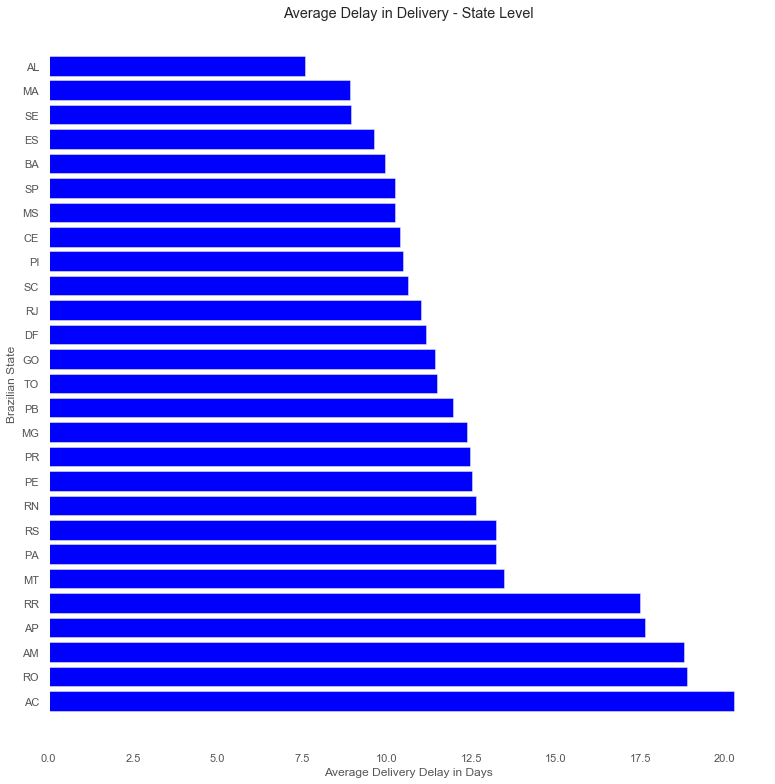

In [201]:
# chart average delay iin delivery by state
fig = plt.figure(figsize = (10,10))
ax = fig.add_axes([0,0,1,1])
y=df4_new_Delay_stat['customer_state']
width = df4_new_Delay_stat['Delay_Delivery']
ax.barh(y,width, color='blue')
ax.set_facecolor('white')
ax.set(xlabel='Average Delivery Delay in Days', 
       ylabel='Brazilian State',
      title='Average Delay in Delivery - State Level')
plt.show()

**Average Delay in Delivery - State Level**  

Another key finding revealed higher delivery delay (days) for the states such as AC (20), RO (18.9), AM(~ 19 days) while lowest delivery delays were measured for AL (8 days) and MA (9 days) respectively (Figure 7). Interestingly, states with highest delivery delay have the lowest population density which can negatively impact delivery network/supply chain efficiency in such states. (Figure 7G.) We should also point out that AM is the Amazonas state in Brazil, a state that is covered almost entirely by the Amazon rainforest.

**Approach to modeling delivery estimate**
Modeling the delivery estimate will involve predicting actual delivery dates for the test set. 
Then 4 days will be added to that prediction to obtain the estimated delivery date. The resulting estimated delivery dates will be a refinement to the currently reported estimated delivery dates.


### <span style="color:blue"> Predict Review Score (Classification task) </span>
From the correlation coefficient heatmap presented in figure 6, review score is associated with item_id. But this relationship needs to be vetted. As previously stated, review_score is associated with delivery attributes.  

**Approach to modeling review score**
The review score attribute is grouped into 3 classes viz: Bad (1 to 2), Fair (3) and  Good (4 to 5) (Figure 8). A review score class will be predicted for the test set instances and the enumerated number of ‘good’ reviews will be used as a key performance index for customer satisfaction. 


# <span style="color:blue"> 8. New Features  </span>
New features were created from their related counterparts. These are highlighted below. 
- Product_dimension was formed from a product of product length, product width and product height.
-Total order amount was derived from price and freight_value attributes and it represents the uniform actual order amount because it excludes payment portions made by using vouchers and boleto payment methods.
- purchase_month and purchase_wk_day were derived by extracting the month and day (respectively) portion of the order_purchase_timestamp converted datetime datatype. 
- Actual duration of order delivery was derived from time duration between order approved date and actual date the customer received the order.
- Estimated duration of order delivery was obtained by calculating the time duration between order approved date and estimated date projected for delivery.
- Delivery estimate discrepancy is the difference between estimated duration of order delivery and actual duration of order delivery.This feature is key to optimizing delivery performance
- Delivery estimate range is binned levels of delivery estimate discrepancy set as too late, late, on-target, early, too early.
    - On-target delivery estimates are those delivered within +- 4 days (arbitrarily set to account for non-working days e.g. weekends) of the actual delivery date.
- Review_score_class is the grouped levels of review score attribute.

The next phase will add a new column for the total length of time it took between each stage of delivery could prove helpful in identifying steps in the logistics process where improvements could be made. Specifically, a factor called Processing, which is the time between the order_approved_at time and the order_delivered_carrier_date. This would show any slowdowns between the customer’s payment being approved and it getting to the shipping/logistics partner. Another factor called Delivery could be created between order_delivered_carrier_date to order_delivered_customer_date, to show any delays with shipping times. 


# <span style="color:blue"> References </span>
1. Olist dataset in [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv)
2. [Olist](https://olist.com/)
3. [Wikipedia Olist](https://pt.wikipedia.org/wiki/Olist)
4. [Violin Plots 101: Visualizing Distribution and Probability Density:](https://mode.com/blog/violin-plot-examples/.) Accessed on 05/15/2021.
5. [Online Review Statistics for 2021(Editor’s Choice)](https://websitebuilder.org/blog/online-review-statistics/#:~:text=About%205%25%E2%80%9310%25%20of,shoppers%20specifically%20seek%20negative%20reviews.&text=About%205%25%E2%80%9310%25%20of,shoppers%20specifically%20seek%20negative%20reviews.) March 20, 2021
6. [Latin America Business Stories, July 31, 2018](https://labsnews.com/en/articles/ecommerce/brazil-ecommerce-shopping-dates/)
7. [Amazonas](https://en.wikipedia.org/wiki/Amazonas_(Brazilian_state))


# <span style="color:blue"> Appendix </span>

### <span style="color:blue"> Approach: </span>
Regression problem (can be changed to classification problem by transforming target to ‘Late delivery’, ‘Early Delivery’ or ‘Precise delivery’)


- Duration_Actual= Actual delivery date (order_delivered_customer_date) - order purchase date (order_purchase_timestamp)
- Duration_Estimated = Estimated delivery date (order_estimated_delivery_date) - order purchase date(order_purchase_timestamp)
- Split to train-test
- Predict ‘actual duration’ for the test. 
    - Set performance threshold (e.g., accuracy of 85%)
- Further compare the predicted result to ‘Estimated delivery’
- Modeling techniques:
    - Start with explainable models so we can determine the important features
        - E.g. linear or logistic regression, single trees model
    - For prediction, apply complex models. E.g. xgboost(), SVM(), ensemble learning techniques.
- Assess model:
    - Keep improving the model till the threshold is surpassed 

### <span style="color:blue"> Evaluation: </span>
    - Evaluate results
        - Compare with the original project requirement.
    - Review the process:
         - Review the steps for any mistake or misstep.
    - Determine next steps: Based on the previous three tasks, determine whether to proceed to deployment, iterate further, or initiate new projects. 
### <span style="color:blue"> Success Criteria  </span>
     - Outcome Measurement: 
     - Measured by improvements to accuracy of estimated delivery times and less bad reviews that mention shipping. 
     - Estimated delivery time is within 1 day of the customer receiving their ordered package.
- Data Importance:
     - Strengthen their competitiveness in the market by 
- Prediction Effectiveness:
     - A major success factor will be to obtain accuracy of at least 85%, precision of at least 80%, sensitivity of at least 85%. These values are subject to review, contingent upon exploratory data analyses.




In [216]:
# export current DF to csv to start new minilab ipynb file
# olist.to_csv('olist_mini.csv')
